# PROJET 11 : LA POULE QUI CHANTE (partie 2)

## 1 Importation des librairies et de la table data

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

from sklearn.metrics import silhouette_score
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

In [126]:
# Importation des données

data = pd.read_csv('Téléchargements.csv')
data.head(3)

,Zone,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,2956.8,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,1.53,5.0,0.54
1,Afrique du Sud,14823.6,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,35.69,143.0,14.11
2,Albanie,14229.3,80.851064,27.659574,-0.010270,1603.534,2884.169,0.37,16.36,85.0,6.26


In [127]:
# Informations

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      168 non-null    object 
 1   PIB                                                       168 non-null    float64
 2   TDI(%)                                                    168 non-null    float64
 3   TAS(%)                                                    168 non-null    float64
 4   croissance_demographique(%)                               168 non-null    float64
 5   distance_France(km)                                       168 non-null    float64
 6   population_2017                                           168 non-null    float64
 7   stabilite_politique                                       168 non-null    float64
 8   Disponibilité alimen

## 2 Analyse des variables

In [128]:
# Définir la variable 'Zone' comme index

data.set_index('Zone', inplace=True)
data.head(3)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,,,,,,,
Afghanistan,2956.8,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,1.53,5.0,0.54
Afrique du Sud,14823.6,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,35.69,143.0,14.11
Albanie,14229.3,80.851064,27.659574,-0.010270,1603.534,2884.169,0.37,16.36,85.0,6.26


### 2.1 Distribution des variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='croissance_demographique(%)'>

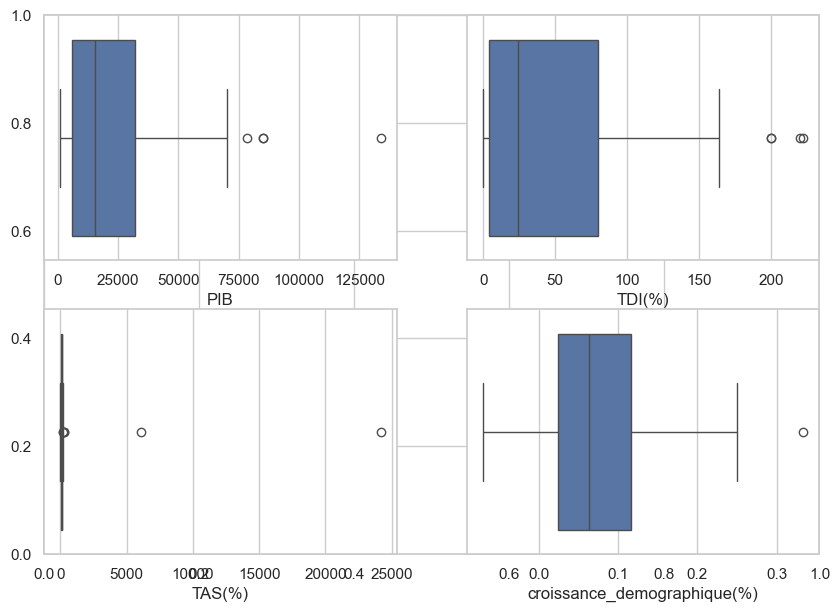

In [129]:
# Analyse univariée

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
plt.legend(fontsize='2')

# Variable 'PIB'
plt.subplot(221)
sns.boxplot(data = data, x ='PIB')

# Variable 'TDI (%)'
plt.subplot(222)
sns.boxplot(data = data, x = 'TDI(%)')

# Variable 'TAS (%)'
plt.subplot(223)
sns.boxplot(data = data, x = 'TAS(%)')

# Variable 'Croissance démographique'
plt.subplot(224)
sns.boxplot(data = data, x ='croissance_demographique(%)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Disponibilité de protéines en quantité (g/personne/jour)'>

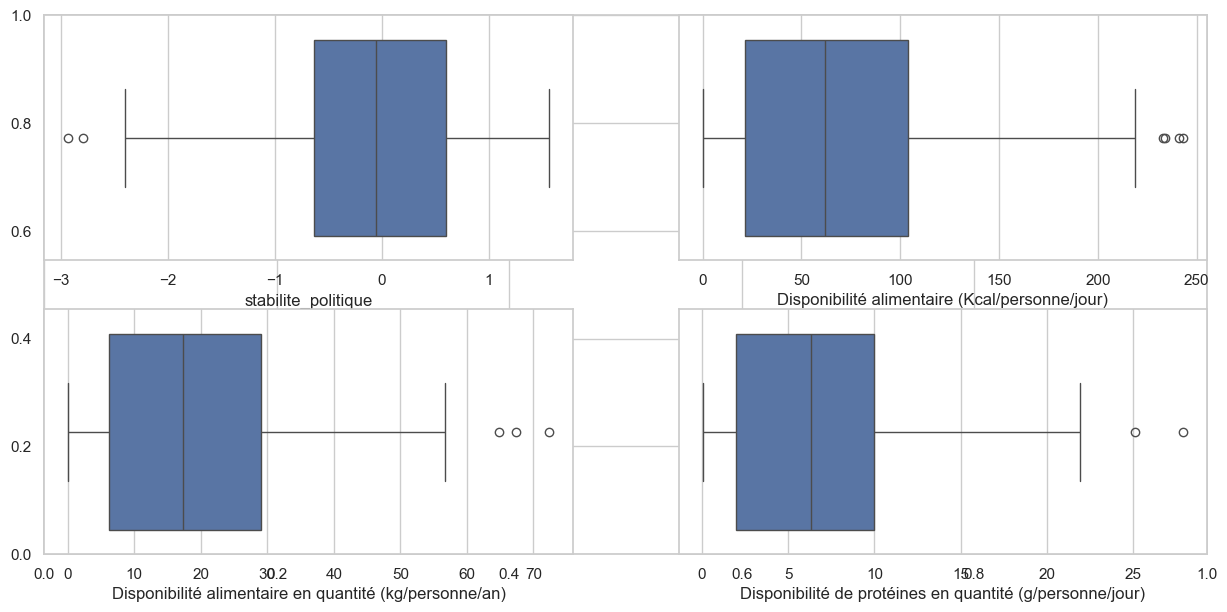

In [130]:
# Analyse univariée

plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")
plt.legend(fontsize='2')

plt.subplot(221)
sns.boxplot(data = data, x ='stabilite_politique')

plt.subplot(222)
sns.boxplot(data = data, x ='Disponibilité alimentaire (Kcal/personne/jour)')

# Variable 'Disponibilité alimentaire/an'
plt.subplot(223)
sns.boxplot(data = data, x ='Disponibilité alimentaire en quantité (kg/personne/an)')

# Variable 'Disponibilité de protéines'
plt.subplot(224)
sns.boxplot(data = data, x = 'Disponibilité de protéines en quantité (g/personne/jour)')

<Axes: xlabel='population_2017'>

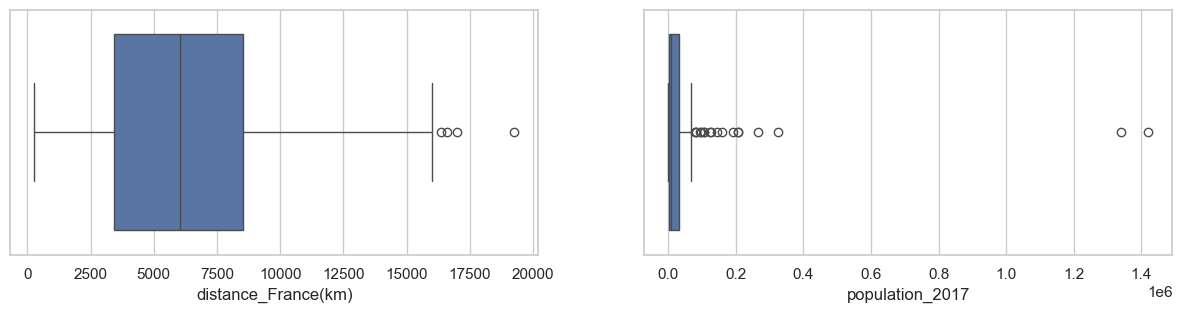

In [131]:
# Analyse univariée

plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data = data, x ='distance_France(km)')

# Variable 'Population 2017'
plt.subplot(222)
sns.boxplot(data = data, x ='population_2017')

### 2.2 Les outliers

In [132]:
import pandas as pd

# Lire le fichier csv
data = pd.read_csv('Téléchargements.csv')

# Définir la colonne 'Zone' comme index
data.set_index('Zone', inplace=True)

# Fonction pour calculer les outliers et retourner les noms des pays
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index.tolist()

# Liste des colonnes à analyser
columns = ['PIB', 'TDI(%)', 'TAS(%)', 'croissance_demographique(%)', 'distance_France(km)', 'population_2017', 'stabilite_politique', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)']

# Créer un DataFrame pour stocker les indices des outliers
outliers_summary = pd.DataFrame(columns=['Variable', 'Pays'])

# Calculer les outliers pour chaque colonne et les ajouter au tableau récapitulatif
for column in columns:
    outliers_indices = find_outliers(data, column)
    outliers_summary = pd.concat([outliers_summary, pd.DataFrame({'Variable': [column], 'Pays': [outliers_indices]})], ignore_index=True)

# Afficher le tableau récapitulatif des indices des outliers
print(outliers_summary)


                                            Variable  \
0                                                PIB   
1                                             TDI(%)   
2                                             TAS(%)   
3                        croissance_demographique(%)   
4                                distance_France(km)   
5                                    population_2017   
6                                stabilite_politique   
7  Disponibilité alimentaire en quantité (kg/pers...   
8     Disponibilité alimentaire (Kcal/personne/jour)   
9  Disponibilité de protéines en quantité (g/pers...   

                                                Pays  
0             [Irlande, Luxembourg, Norvège, Suisse]  
1      [Belgique, Gambie, Timor-Leste, Îles Salomon]  
2  [Belgique, Djibouti, Maldives, Pays-Bas, Polog...  
3                                             [Oman]  
4      [Australie, Fidji, Nouvelle-Zélande, Vanuatu]  
5  [Allemagne, Bangladesh, Brésil, Chine, contine... 

In [133]:
# Variable TAS(%)

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['TAS(%)'].quantile(0.25)
Q3 = data['TAS(%)'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['TAS(%)'] < lower_bound) | (data['TAS(%)'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'TAS(%)':", outlier_indices.tolist())

Indices of outliers in 'TAS(%)': ['Belgique', 'Djibouti', 'Maldives', 'Pays-Bas', 'Pologne', 'Thaïlande']


In [134]:
# Variable TDI(%)

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['TDI(%)'].quantile(0.25)
Q3 = data['TDI(%)'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['TDI(%)'] < lower_bound) | (data['TDI(%)'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'TDI(%)':", outlier_indices.tolist())

Indices of outliers in 'TDI(%)': ['Belgique', 'Gambie', 'Timor-Leste', 'Îles Salomon']


In [135]:
# Variable PIB

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['PIB'].quantile(0.25)
Q3 = data['PIB'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['PIB'] < lower_bound) | (data['PIB'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'PIB':", outlier_indices.tolist())

Indices of outliers in 'PIB': ['Irlande', 'Luxembourg', 'Norvège', 'Suisse']


In [136]:
# Variable Distance_France

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['distance_France(km)'].quantile(0.25)
Q3 = data['distance_France(km)'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['distance_France(km)'] < lower_bound) | (data['distance_France(km)'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'distance_France(km)':", outlier_indices.tolist())

Indices of outliers in 'distance_France(km)': ['Australie', 'Fidji', 'Nouvelle-Zélande', 'Vanuatu']


In [137]:
# Variable population

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['population_2017'].quantile(0.25)
Q3 = data['population_2017'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['population_2017'] < lower_bound) | (data['population_2017'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'population_2017':", outlier_indices.tolist())

Indices of outliers in 'population_2017': ['Allemagne', 'Bangladesh', 'Brésil', 'Chine, continentale', 'Fédération de Russie', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Japon', 'Mexique', 'Nigéria', 'Pakistan', 'Philippines', 'Turquie', 'Viet Nam', 'Égypte', "États-Unis d'Amérique", 'Éthiopie']


In [138]:
# Outliers de TDI

data.sort_values(by='TDI(%)', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,,,,,,,
Belgique,60044.600000,222.368421,304.605263,0.030165,262.384500,1.141975e+04,0.420000,12.65,44.0,4.57
Timor-Leste,4347.900000,220.000000,20.000000,0.097321,6031.922414,1.243258e+03,0.070000,4.24,14.0,1.46
Îles Salomon,2896.700000,200.000000,0.000000,0.143825,15178.200000,6.360390e+02,0.190000,4.45,18.0,1.51
Gambie,2502.500000,200.000000,25.000000,0.162139,4308.250000,2.213889e+03,-0.090000,3.53,12.0,1.24
Pays-Bas,22977.733333,163.440860,295.698925,0.071499,6031.922414,4.348916e+04,-0.083916,20.33,70.0,8.48
...,...,...,...,...,...,...,...,...,...,...
Tunisie,12685.400000,0.000000,109.230769,0.054065,1483.828000,1.143344e+04,-1.020000,17.03,57.0,6.28
Ouganda,2547.000000,0.000000,98.484848,0.191208,6128.938000,4.116659e+04,-0.570000,1.52,5.0,0.51
Inde,7363.800000,0.000000,96.831467,0.057590,6594.230000,1.338677e+06,-0.770000,2.22,7.0,0.75


In [139]:
# Variable TDI

# Étape 1: Calculer les quartiles et l'IQR
Q1 = data['TDI(%)'].quantile(0.25)
Q3 = data['TDI(%)'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2: Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Étape 3: Filtrer les outliers
outliers = data[(data['TDI(%)'] < lower_bound) | (data['TDI(%)'] > upper_bound)]

# Afficher les indices des lignes qui contiennent des outliers

outlier_indices = outliers.index
print("Indices of outliers in 'TDI(%)':", outlier_indices.tolist())

Indices of outliers in 'TDI(%)': ['Belgique', 'Gambie', 'Timor-Leste', 'Îles Salomon']


In [140]:
# Outliers de TAS

data.sort_values(by='TAS(%)', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,,,,,,,
Djibouti,5474.600000,100.000000,24173.015873,0.087500,5595.459000,944.099000,-0.730000,2.68,9.0,0.92
Maldives,19332.600000,100.000000,6043.253968,0.249637,8294.178000,496.402000,0.220000,13.50,47.0,4.70
Belgique,60044.600000,222.368421,304.605263,0.030165,262.384500,11419.748000,0.420000,12.65,44.0,4.57
Pays-Bas,22977.733333,163.440860,295.698925,0.071499,6031.922414,43489.162569,-0.083916,20.33,70.0,8.48
Pologne,34689.400000,4.757785,203.373702,-0.007164,1368.178000,37953.180000,0.510000,30.30,107.0,12.14
...,...,...,...,...,...,...,...,...,...,...
Mongolie,14647.500000,111.111111,0.000000,0.102343,7053.423000,3113.786000,0.780000,2.77,9.0,0.95
Luxembourg,133845.000000,100.000000,0.000000,0.115008,289.102300,591.910000,1.310000,18.33,69.0,7.19
Dominique,15285.200000,100.000000,0.000000,0.006947,6826.396000,71.458000,1.170000,35.19,150.0,11.52


In [141]:
# Exclure les 2 pays qui ont des valeurs extrèmes

data = data.drop(['Djibouti','Maldives'])

In [142]:
# Moyennes de chaque variable

data.mean()

PIB                                                         22169.866064
TDI(%)                                                         42.861631
TAS(%)                                                         78.914978
croissance_demographique(%)                                     0.070344
distance_France(km)                                          6020.923666
population_2017                                             44480.651980
stabilite_politique                                            -0.096299
Disponibilité alimentaire en quantité (kg/personne/an)         19.978735
Disponibilité alimentaire (Kcal/personne/jour)                 73.481928
Disponibilité de protéines en quantité (g/personne/jour)        7.018795
dtype: float64

### 2.3 Corrélations des variables


Text(0.5, 1.0, 'Graphique 1: Corrélation entre les variables')

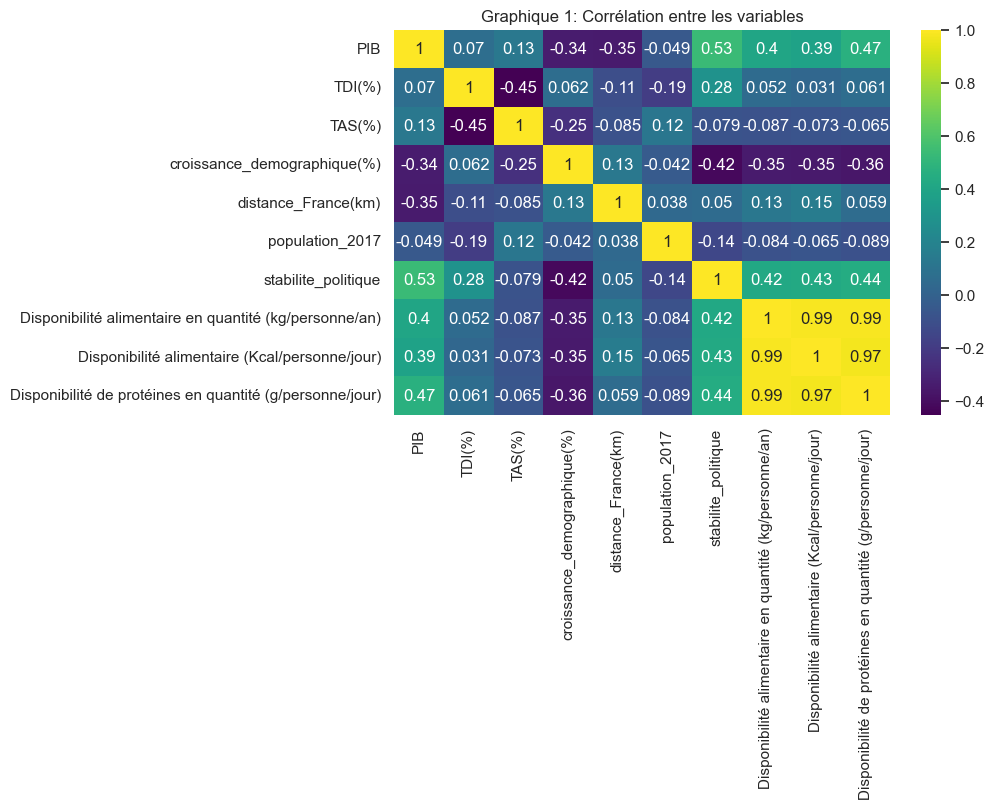

In [143]:
# Carte de chaleur /Heatmap des corrélations entre les variables

plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)
plt.title('Graphique 1: Corrélation entre les variables')

Les disponibilités sont très correlées entre elles.

In [144]:
# Suppression des autres Disponibilités

data = data.drop(columns = ['Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de protéines en quantité (g/personne/jour)'])
data.head(3)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire (Kcal/personne/jour)
Zone,,,,,,,,
Afghanistan,2956.8,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,5.0
Afrique du Sud,14823.6,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,143.0
Albanie,14229.3,80.851064,27.659574,-0.010270,1603.534,2884.169,0.37,85.0


In [145]:
# Renommer la variable disponibilité

data.rename(columns = {'Disponibilité alimentaire (Kcal/personne/jour)': 'disponibilite_alimentaire'}, inplace = True)
data.head(3)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire
Zone,,,,,,,,
Afghanistan,2956.8,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,5.0
Afrique du Sud,14823.6,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,143.0
Albanie,14229.3,80.851064,27.659574,-0.010270,1603.534,2884.169,0.37,85.0


## 3 Etude de marché approfondie



### 3.1 Les variables : Analyse en composantes principales (ACP)

#### a. Eboulis des valeurs propres

In [146]:
# Normalisation des données

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Transformation en array Numpy

X = data.values

# Standardiser les données

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

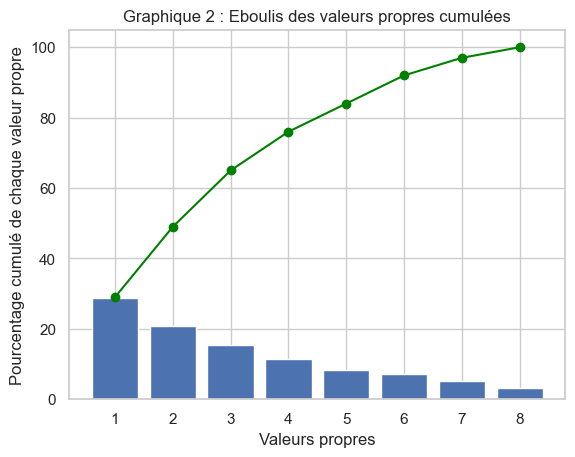

In [147]:
# Eboulis des valeurs propres

n_components = 8
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

# pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="green",marker='o')
plt.xlabel("Valeurs propres")
plt.ylabel("Pourcentage cumulé de chaque valeur propre")
plt.title("Graphique 2 : Eboulis des valeurs propres cumulées")
plt.show(block=False)

On a utilisé l'Eboulis des valeurs propres pour choisir :

Le nombre de composantes principales qui expliquent un pourcentage de la variance, ici 5.

Il s'agit du nombre de composantes principales correspondant au « coude » du graphe, à partir duquel ajouter une nouvelle composante principale ne fait pas grande différence.

#### b. Les composantes principales

In [148]:
# Calcul des premières composantes principales
# Pourcentage de variance expliquée

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.28688689 0.20694576 0.15361855 0.11316705 0.08227371 0.07213763
 0.05306969 0.03190071]
0.9999999999999998


 Le pourcentage de variance expliquée par chacune des composantes : Les 2 premières composantes expliquent environ 50% de la variance observée dans les données.

 Les 5 premières composantes expliquent 84% et les 7PCP expliquent 96 % de la variance totale.

 Commençons par visualiser nos données sur les 2 premières composantes principales, afin d'avoir une première vue sur une base orthonormée (en 2D).

#### c. Contribution de chaque variable aux composantes

In [149]:
features = ['PIB', 'TDI(%)',	'TAS(%)',	'croissance_demographique(%)',	'distance_France(km)',	'population_2017',	'stabilite_politique',	'disponibilite_alimentaire']

def correlation_graph(pca,
                      x_y,
                      features) :
# Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(9, 7))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Graphique 3 :Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
   # Axes et display
    plt.axis('equal')
    plt.show(block=False)

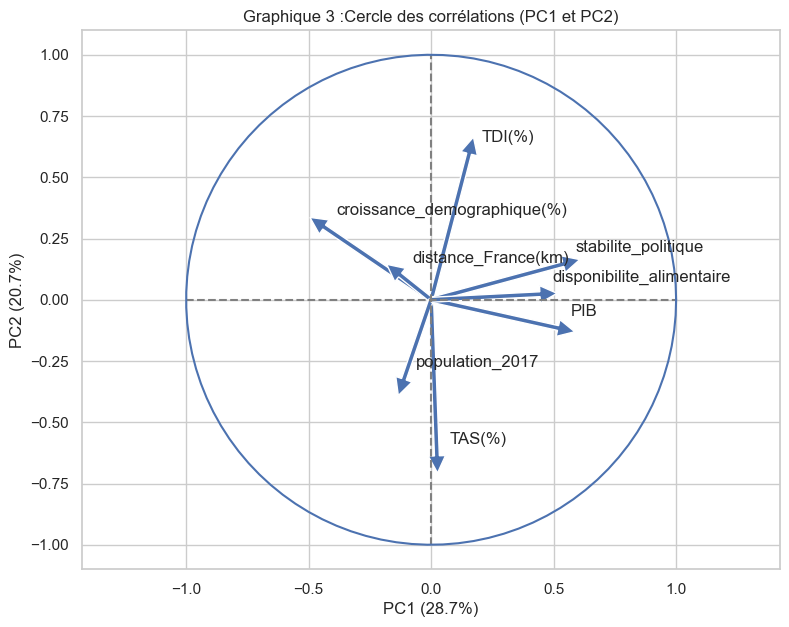

In [150]:
# PC1 et PC2 (~ 50%)

correlation_graph(pca, (0,1), features)

In [151]:
# Les composantes

#pcs = pca.components_

In [152]:
#pcs = pd.DataFrame(pcs)
#pcs

In [153]:
#pcs.columns = features

In [154]:
# Ajouter les variables

#pcs.T

In [155]:
# Corrélation PCP et variables

t=pca.components_[:]
df_corr_comp = pd.DataFrame(t, index=[f'PC{i+1}' for i in range(t.shape[0])], columns=features)
df_corr_comp.head()


,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire
PC1,0.518014,0.155168,0.023574,-0.436640,-0.126442,-0.111191,0.539136,0.444247
PC2,-0.115428,0.596145,-0.637152,0.296747,0.100970,-0.324574,0.145642,0.022597
PC3,-0.255723,-0.215712,-0.074990,-0.056951,0.816583,0.136112,0.140747,0.417209
PC4,0.063408,0.226061,-0.292603,-0.030274,-0.105880,0.919879,0.030617,-0.004180
PC5,0.416051,-0.378307,-0.218677,0.585809,-0.150025,0.006403,-0.226352,0.467984


In [156]:
df_corr_comp.head().T

,PC1,PC2,PC3,PC4,PC5
PIB,0.518014,-0.115428,-0.255723,0.063408,0.416051
TDI(%),0.155168,0.596145,-0.215712,0.226061,-0.378307
TAS(%),0.023574,-0.637152,-0.074990,-0.292603,-0.218677
croissance_demographique(%),-0.436640,0.296747,-0.056951,-0.030274,0.585809
distance_France(km),-0.126442,0.100970,0.816583,-0.105880,-0.150025
population_2017,-0.111191,-0.324574,0.136112,0.919879,0.006403
stabilite_politique,0.539136,0.145642,0.140747,0.030617,-0.226352
disponibilite_alimentaire,0.444247,0.022597,0.417209,-0.004180,0.467984


<Axes: >

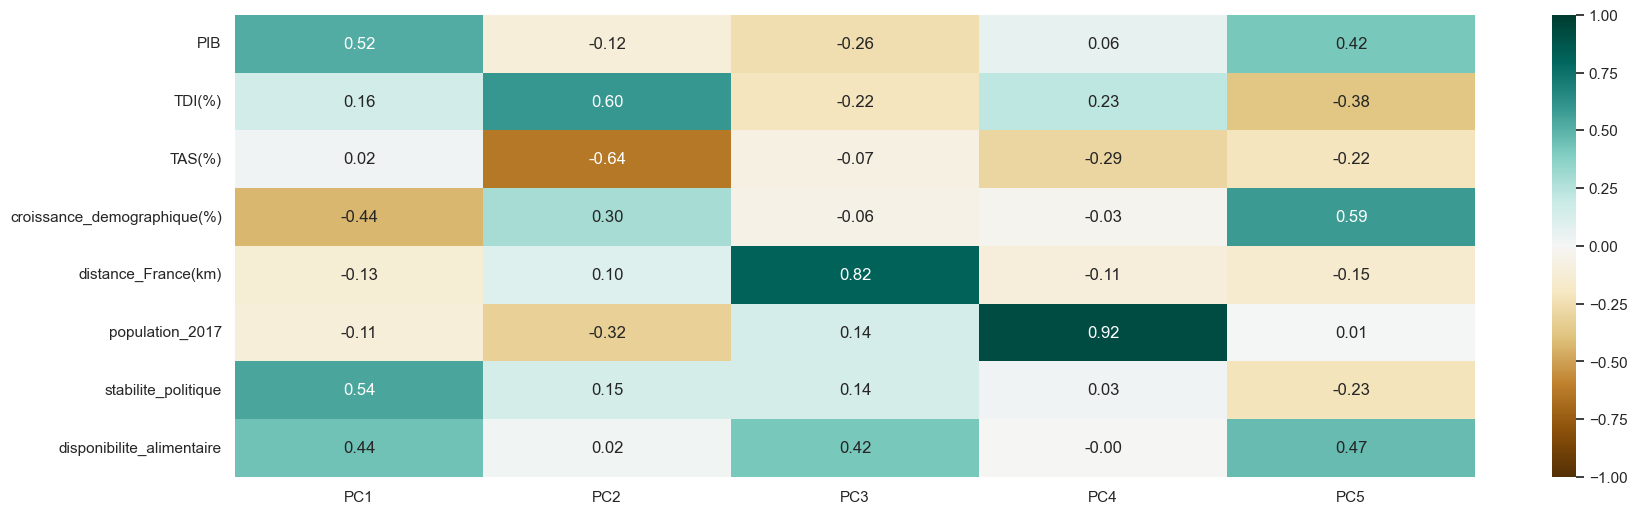

In [157]:
# Heatmap

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(df_corr_comp.head().T, vmin=-1, vmax=1, annot=True, cmap="BrBG", fmt="0.2f")

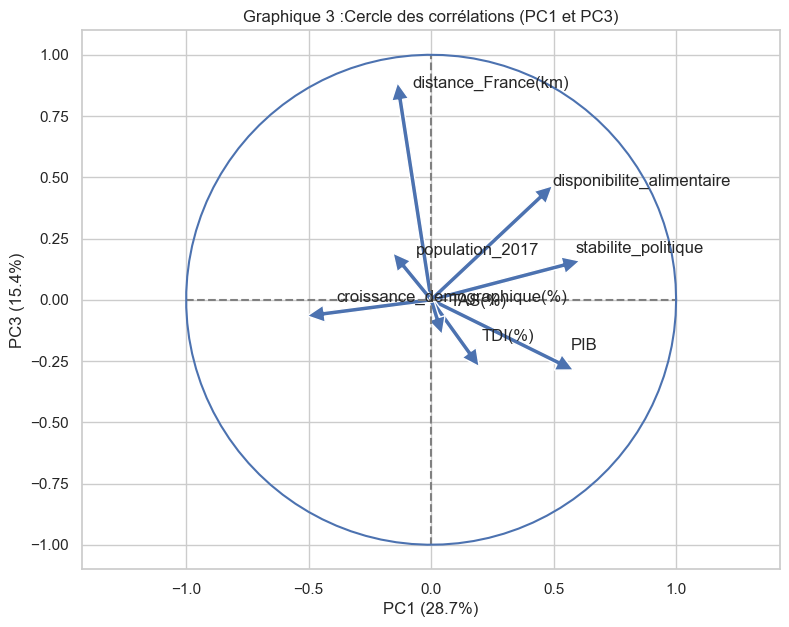

In [158]:
# PC1 et PC3 (~ 47%)

correlation_graph(pca, (0,2), features)


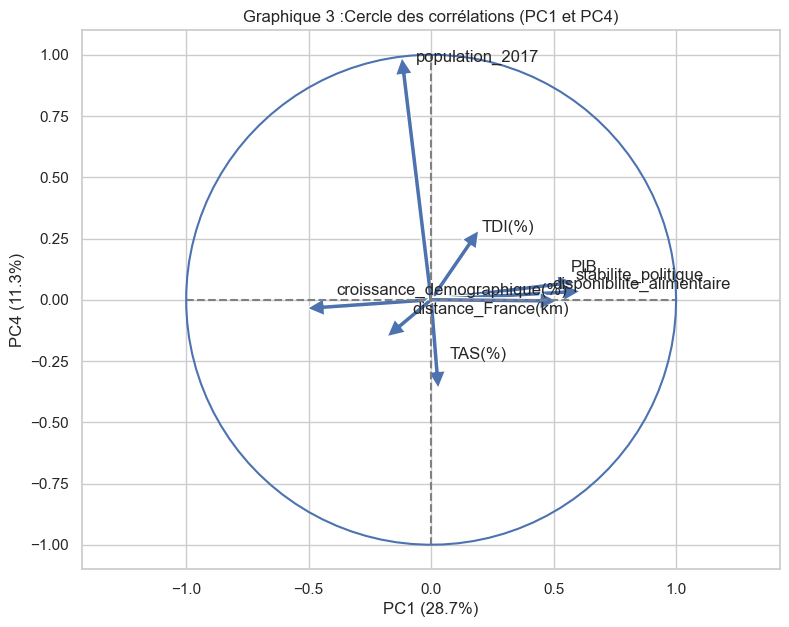

In [159]:
# PC1 et PC4 (~ 40%)

correlation_graph(pca, (0,3), features)


Cette analyse a permis de représenter les données en 2D (base orthonormée) et de comprendre un peu mieux nos variables, et voir le plan avec le plus grand pourcentage pour représenter nos données.

#### d. Représentation des individus (pays) en 2D /selon les deux premières composantes principales

In [160]:
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
 # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'Paired')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Graphique 6 : Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()

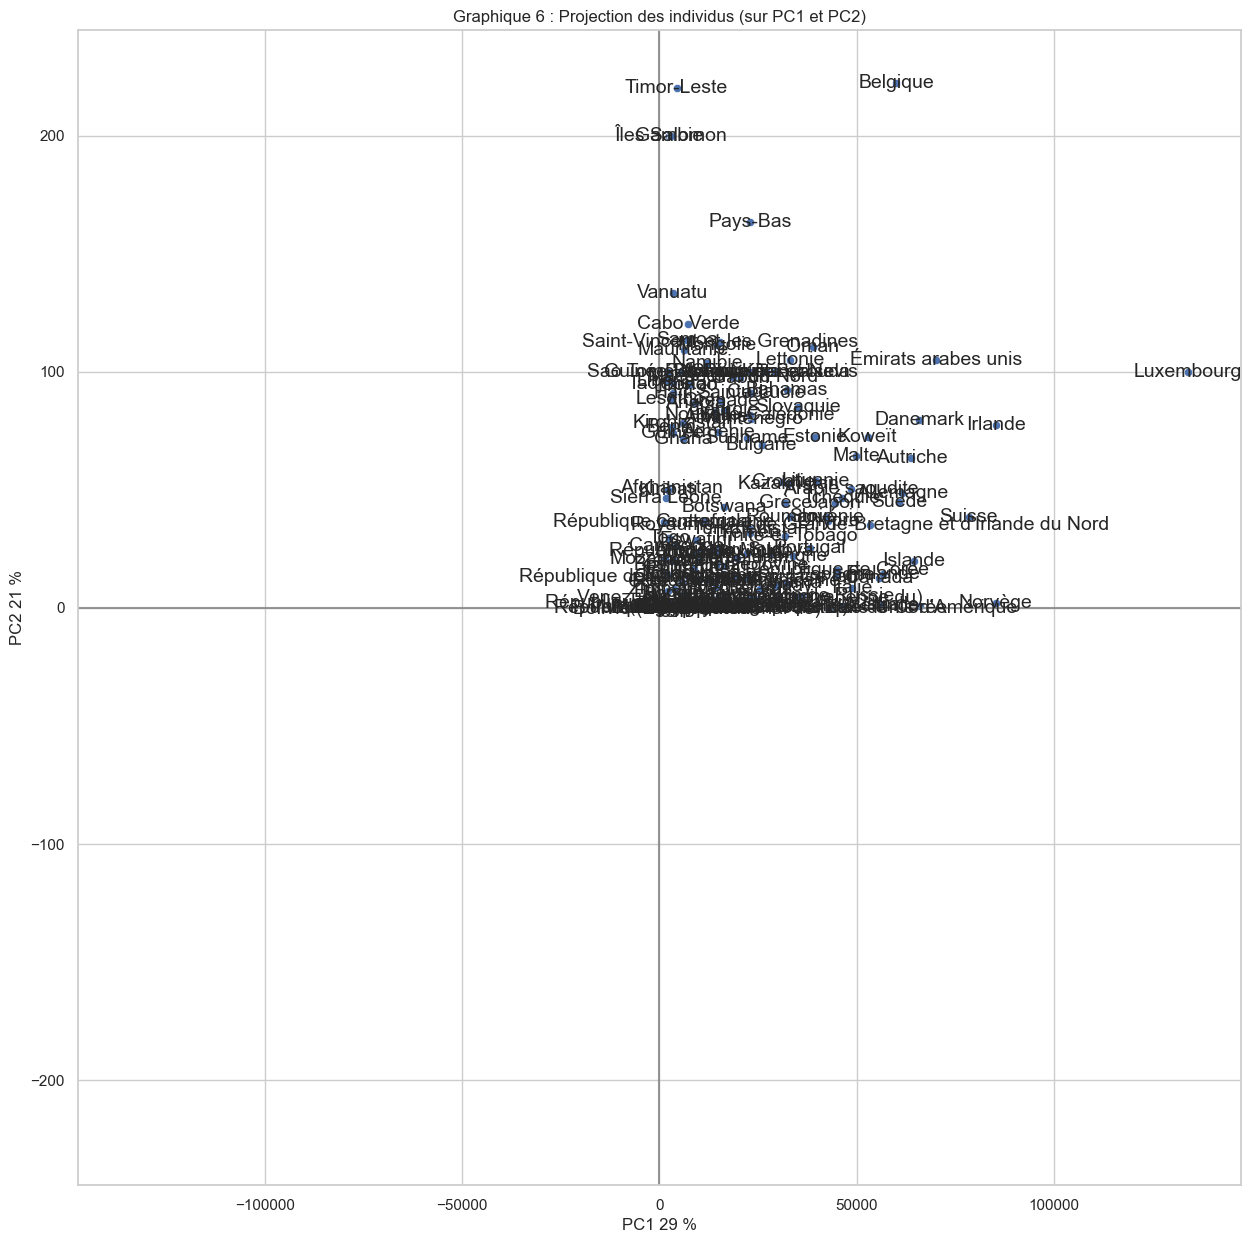

In [161]:
x_y = [0,1]
display_factorial_planes(data, x_y, pca, figsize=(15,15), marker="o", labels = data.index)

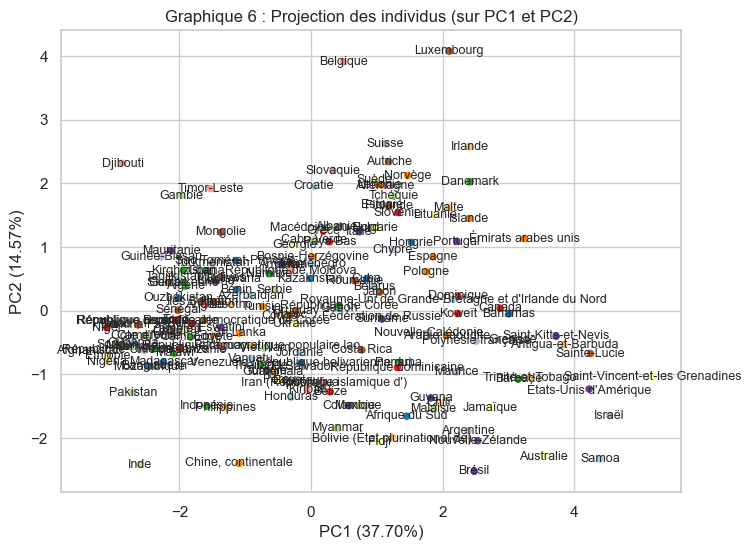

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Lire le fichier csv
data = pd.read_csv('Téléchargements.csv')

# Normalisation des données
X = data.drop(columns=['Zone']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_scaled)

# Ajouter les résultats de la PCA au DataFrame
data['PC1'] = X_projected[:, 0]
data['PC2'] = X_projected[:, 1]

# Créer le scatter plot
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=data, x='PC1', y='PC2', hue='Zone', palette='Paired', legend=None)

# Ajouter les labels des points
for i in range(data.shape[0]):
    plt.text(data['PC1'][i], data['PC2'][i], data['Zone'][i], fontsize=9, ha='center', va='center')

# Nom des axes avec le pourcentage d'inertie expliqué
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

# Titre et affichage
plt.title('Graphique 6 : Projection des individus (sur PC1 et PC2)')
plt.show()



In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Lire le fichier csv
data = pd.read_csv('Téléchargements.csv')

# Normalisation des données
X = data.drop(columns=['Zone']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_scaled)

# Ajouter les résultats de la PCA au DataFrame
data['PC1'] = X_projected[:, 0]
data['PC2'] = X_projected[:, 1]

# Filtrer les pays avec PC1 entre 0 et 4 et PC2 entre 1 et 4
filtered_data = data[(data['PC1'] >= 0) & (data['PC1'] <= 4) & (data['PC2'] >= 1) & (data['PC2'] <= 4)]

# Afficher le tableau récapitulatif des pays filtrés
print(filtered_data[['Zone', 'PC1', 'PC2']])









                    Zone       PC1       PC2
2                Albanie  0.381022  1.315476
4              Allemagne  1.117741  1.964138
11              Autriche  1.180205  2.339074
16              Belgique  0.492289  3.903850
22              Bulgarie  0.975030  1.299429
26            Cabo Verde  0.049280  1.109174
36               Croatie  0.042975  1.951186
39              Danemark  2.417825  2.020231
44               Estonie  1.078071  1.662879
47              Finlande  1.181871  1.637264
53                 Grèce  0.188268  1.249173
61               Hongrie  1.525575  1.070236
66               Irlande  2.413134  2.570757
67               Islande  2.408043  1.446893
69                Italie  0.730444  1.237688
79              Lettonie  1.041477  1.979350
82              Lituanie  1.880027  1.504046
84     Macédoine du Nord  0.204616  1.305205
90                 Malte  2.088884  1.616355
103              Norvège  1.468770  2.120722
113             Pays-Bas  0.281690  1.080435
117       

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Lire le fichier csv
data = pd.read_csv('Téléchargements.csv')

# Normalisation des données
X = data.drop(columns=['Zone']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_scaled)

# Ajouter les résultats de la PCA au DataFrame
data['PC1'] = X_projected[:, 0]
data['PC2'] = X_projected[:, 1]

# Filtrer les pays avec PC1 entre 0 et 4 et PC2 entre 1 et 4
filtered_data = data[(data['PC1'] >= 0) & (data['PC1'] <= 4) & (data['PC2'] >= 1) & (data['PC2'] <= 4)]

# Afficher le tableau récapitulatif des pays filtrés avec leurs valeurs de variables
filtered_data.head()


,Zone,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),PC1,PC2
2,Albanie,14229.3,80.851064,27.659574,-0.010270,1603.5340,2884.169,0.37,16.36,85.0,6.26,0.381022,1.315476
4,Allemagne,61563.6,48.418631,87.061530,0.020819,439.8984,82658.409,0.57,19.47,71.0,7.96,1.117741,1.964138
11,Autriche,63840.4,63.583815,85.549133,0.037364,1035.1440,8819.901,1.03,18.20,65.0,7.49,1.180205,2.339074
16,Belgique,60044.6,222.368421,304.605263,0.030165,262.3845,11419.748,0.42,12.65,44.0,4.57,0.492289,3.903850
22,Bulgarie,25875.6,68.789809,68.152866,-0.031573,1760.7070,7102.444,0.32,22.06,81.0,8.74,0.975030,1.299429


#### e. Visualisation des individus (pays) en 2D en fonction de chaque variable

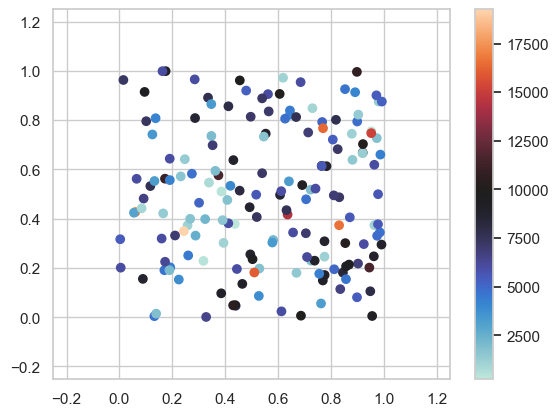

In [165]:
# Représentation de chaque pays selon ces deux dimensions uniquement, en fonction de la distance
X_projected = np.random.rand(len(data), 2)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=data['distance_France(km)'], cmap='icefire')
plt.xlim([-0.25, 1.25])
plt.ylim([-0.25, 1.25])
plt.colorbar()

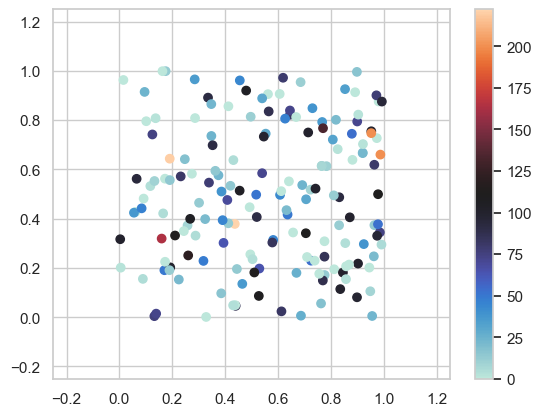

In [166]:
# Représentation de chaque pays selon ces deux dimensions uniquement, en fonction du TDI

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=data['TDI(%)'], cmap='icefire')
plt.xlim([-0.25, 1.25])
plt.ylim([-0.25, 1.25])
plt.colorbar()

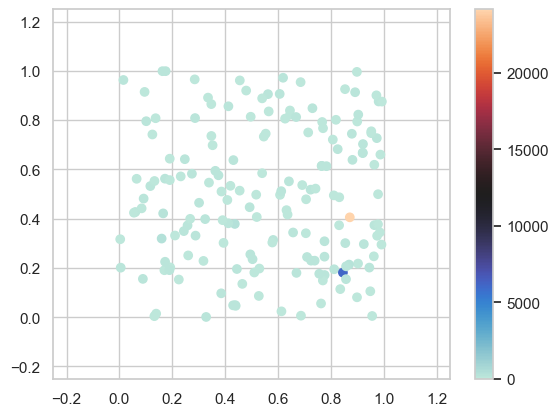

In [167]:
# Représentation de chaque pays selon ces deux dimensions uniquement, en fonction du TAS

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=data['TAS(%)'], cmap='icefire')
plt.xlim([-0.25, 1.25])
plt.ylim([-0.25, 1.25])
plt.colorbar()

L'ACP nous a permis de :

Représenter les données en deux dimensions ;

Mettre au jour des corrélations entre des variables

Etablir des profils des pays


### 3.2 Clustering : groupages par pays (lignes)

#### 3.2.1.Classification ascendante hiérarchique (CAH)


Le clustering permet de partitionner un jeu de données en sous-groupes d'observations similaires afin de mieux les comprendre. On va utiliser 2 méthodes : CAH et K-means

CAH : pemet de segmenter les données de manière hiérarchique, pour faciliter leur interprétation.

K-Means utilise le coude pour déterminer le nombre de clusters.



In [168]:
# Création d'une Matrice des liens selon la Méthode de Ward

Z = linkage(X_scaled, method = 'ward', metric = 'euclidean')

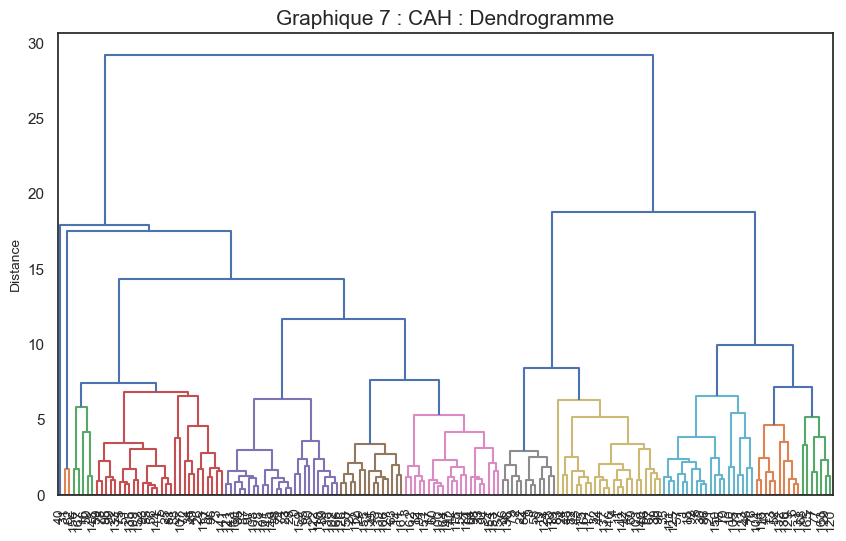

In [169]:
# Affichage du dendrogramme entier pour avoir une première vue des clusters/7

fig =plt.figure(figsize=(10,6))
sns.set_style('white')
plt.title("Graphique 7 : CAH : Dendrogramme", fontsize = 15)
plt.ylabel('Distance', fontsize=10)
plt.axhline(linewidth = 2, color = "dimgray", linestyle = "-.")
dendrogram(Z, labels = data.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.show()

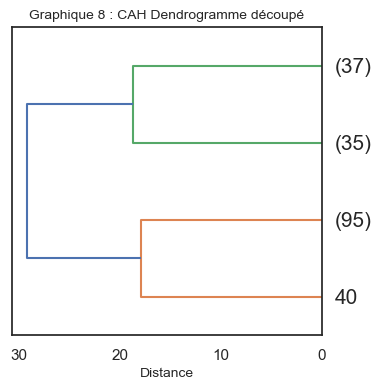

In [170]:
# Découpage du dendrogramme en groupes pour avoir une première idée du partitionnement (5 clusters par exemple)/ 8

fig = plt.figure(figsize=(4,4))
plt.title('Graphique 8 : CAH Dendrogramme découpé', fontsize = 10)
plt.xlabel('Distance', fontsize=10)
dendrogram(Z, labels = data.index, p=4, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

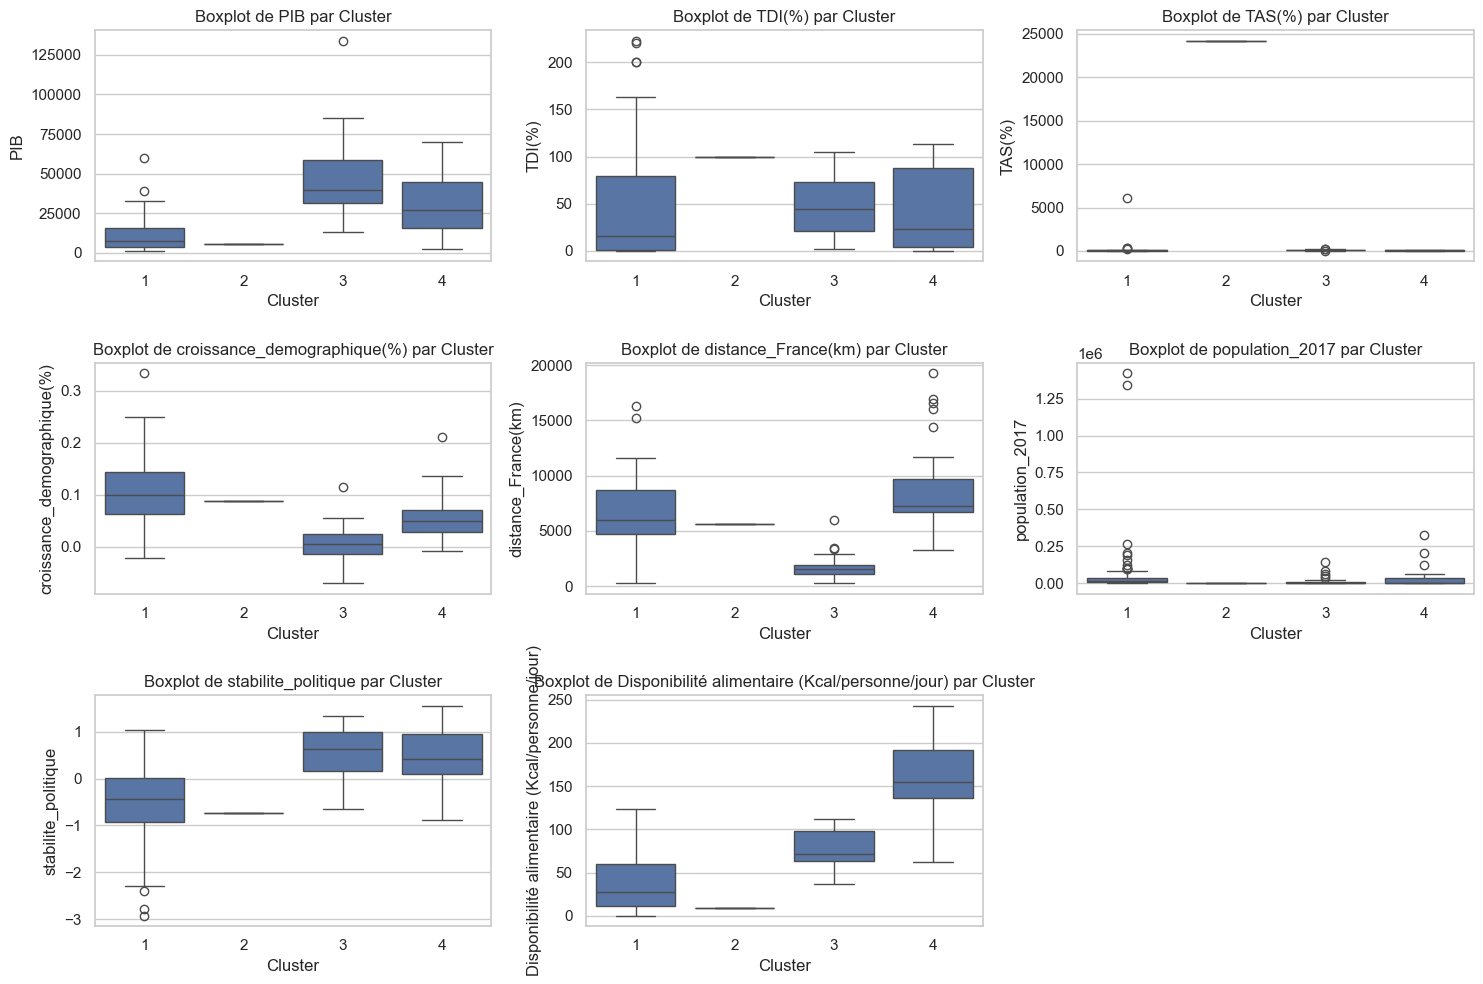

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Lire le fichier csv
data = pd.read_csv('Téléchargements.csv')

# Normalisation des données
X = data.drop(columns=['Zone']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# CAH
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Découpage du dendrogramme en 4 clusters
clusters = fcluster(Z, 4, criterion='maxclust')

# Ajouter les clusters au DataFrame
data['Cluster'] = clusters

# Créer un boxplot pour chaque variable en fonction des clusters
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Liste des variables à visualiser
variables = ['PIB', 'TDI(%)', 'TAS(%)', 'croissance_demographique(%)', 'distance_France(km)', 'population_2017', 'stabilite_politique', 'Disponibilité alimentaire (Kcal/personne/jour)']

# Créer un subplot pour chaque variable
for i, var in enumerate(variables):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Cluster', y=var, data=data)
    plt.title(f'Boxplot de {var} par Cluster')

plt.tight_layout()
plt.show()


In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Lire le fichier csv
data = pd.read_csv('Téléchargements.csv')

# Normalisation des données
X = data.drop(columns=['Zone']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# CAH
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Découpage du dendrogramme en 4 clusters
clusters = fcluster(Z, 4, criterion='maxclust')

# Ajouter les clusters au DataFrame
data['Cluster'] = clusters

# Réorganiser les colonnes pour déplacer 'Cluster' à côté de 'Zone'
cols = list(data.columns)
cols.insert(1, cols.pop(cols.index('Cluster')))
data = data[cols]

# Filtrer les pays appartenant au cluster 3
cluster_3 = data[data['Cluster'] == 3]

# Trier les pays du cluster 3 par ordre décroissant de TDI(%)
cluster_3_sorted = cluster_3.sort_values(by='TDI(%)', ascending=False)

# Afficher le tableau récapitulatif des pays pour le cluster 3 trié par TDI(%)
print("Cluster 3 trié par TDI(%):")
cluster_3_sorted.head(10)








Cluster 3 trié par TDI(%):


,Zone,Cluster,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
79,Lettonie,3,33126.8,104.878049,80.487805,-0.056993,1704.5980,1951.097,0.45,20.89,72.0,7.22
83,Luxembourg,3,133845.0,100.000000,0.000000,0.115008,289.1023,591.910,1.31,18.33,69.0,7.19
84,Macédoine du Nord,3,18709.2,97.560976,4.878049,0.003721,1672.0400,2081.996,-0.26,19.73,68.0,7.01
136,Slovaquie,3,35039.6,85.135135,95.945946,0.006096,1094.6100,5447.900,0.90,13.90,48.0,4.74
58,Géorgie,3,16401.7,83.606557,36.065574,-0.013629,3373.3490,4008.716,-0.38,15.27,51.0,5.19
2,Albanie,3,14229.3,80.851064,27.659574,-0.010270,1603.5340,2884.169,0.37,16.36,85.0,6.26
39,Danemark,3,65783.5,79.640719,103.592814,0.021631,1027.6090,5732.274,0.85,28.98,112.0,12.97
66,Irlande,3,85225.2,77.343750,85.937500,0.031483,778.2031,4753.279,0.99,25.82,100.0,11.60
9,Arménie,3,14880.6,74.468085,23.404255,0.020996,3434.0710,2944.791,-0.63,16.06,54.0,5.44
44,Estonie,3,39351.2,72.413793,68.965517,-0.002848,1859.0910,1319.390,0.64,21.26,86.0,7.27


In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Lire le fichier csv
data = pd.read_csv('Téléchargements.csv')

# Normalisation des données
X = data.drop(columns=['Zone']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# CAH
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Découpage du dendrogramme en 4 clusters
clusters = fcluster(Z, 4, criterion='maxclust')

# Ajouter les clusters au DataFrame
data['Cluster'] = clusters

# Réorganiser les colonnes pour déplacer 'Cluster' à côté de 'Zone'
cols = list(data.columns)
cols.insert(1, cols.pop(cols.index('Cluster')))
data = data[cols]

# Filtrer les pays appartenant au cluster 4
cluster_4 = data[data['Cluster'] == 4]

# Trier les pays du cluster 4 par ordre décroissant de TDI(%)
cluster_4_sorted = cluster_4.sort_values(by='TDI(%)', ascending=False)

# Afficher le tableau récapitulatif des pays pour le cluster 4 trié par TDI(%)
print("Cluster 4 trié par TDI(%):")
cluster_4_sorted.head(10)


Cluster 4 trié par TDI(%):


,Zone,Cluster,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
132,Samoa,4,6884.400000,113.333333,0.000000,0.033122,16011.920000,195.352000,1.160000,64.77,217.0,21.88
130,Saint-Vincent-et-les Grenadines,4,15374.600000,112.500000,0.000000,0.012837,6989.701000,109.827000,0.870000,72.31,243.0,25.10
163,Émirats arabes unis,4,70048.500000,105.097087,11.650485,0.037806,5249.535000,9487.203000,0.600000,43.47,147.0,14.80
6,Antigua-et-Barbuda,4,26949.100000,100.000000,0.000000,0.055492,6708.770000,95.426000,0.730000,54.10,233.0,17.77
129,Saint-Kitts-et-Nevis,4,29272.100000,100.000000,0.000000,0.043258,6760.687000,52.045000,0.630000,55.77,190.0,19.22
116,Polynésie française,4,22977.733333,100.000000,6.666667,0.071499,6031.922414,43489.162569,-0.083916,47.40,167.0,16.20
41,Dominique,4,15285.200000,100.000000,0.000000,0.006947,6826.396000,71.458000,1.170000,35.19,150.0,11.52
13,Bahamas,4,32329.700000,92.307692,23.076923,0.049977,7209.450000,381.755000,0.980000,43.17,182.0,14.61
131,Sainte-Lucie,4,23300.100000,90.909091,9.090909,0.024388,6903.772000,180.954000,0.970000,56.69,241.0,19.00
52,Grenade,4,15562.300000,87.500000,12.500000,0.031904,7120.287000,110.874000,0.990000,45.70,192.0,15.50


Avec le CAH on identifie plusieurs clusters distincts.
Utilisons la méthode du KMeans pour déterminer le nombre max de clusters.

#### 3.2.2.Méthode de KMeans


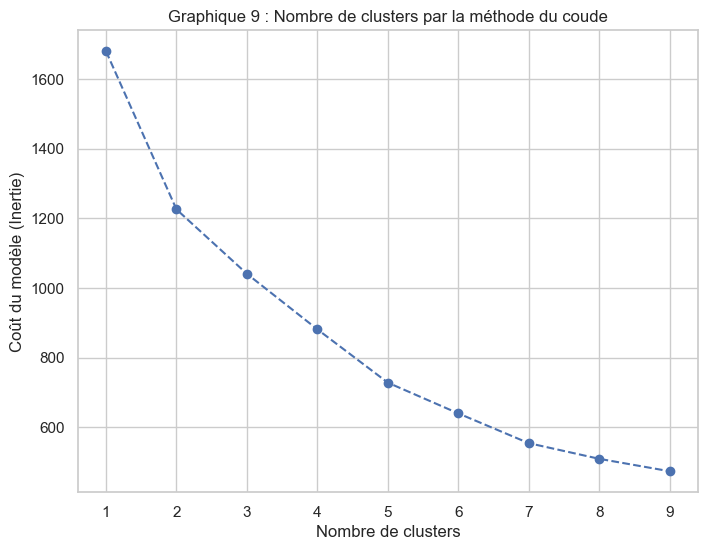

In [181]:
# Recherche du nombre de clusters par la méthode du coude /9

inertia = []
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(model.inertia_)

# Affichage du graphique de la méthode du coude
fig = plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle (Inertie)')
plt.title('Graphique 9 : Nombre de clusters par la méthode du coude')
plt.grid(True)
plt.show()

On peut dire qu'à partir de 4 ou 5 clusters, l'ajout de clusters supplémentaires n'apporte plus de gain significatif en termes de réduction de l'inertie.

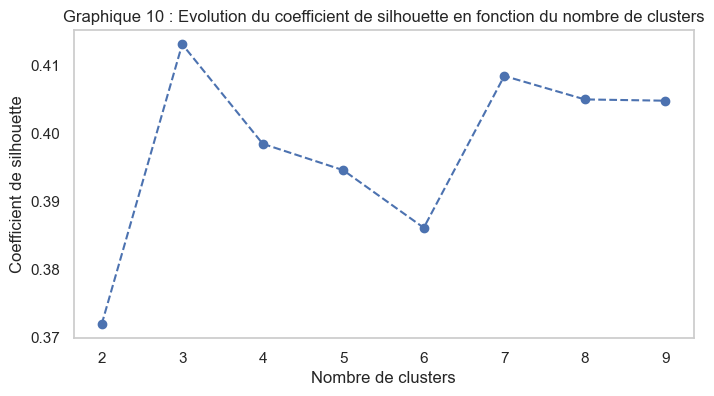

In [182]:
# Recherche du coefficient de silhouette

tab_silhouette = []
k_range = range(2, 10)
for k in k_range:
    model = KMeans(n_clusters=k)
    cluster_labels = model.fit_predict(X_projected)
    silhouette_avg = silhouette_score(X_projected, cluster_labels)
    tab_silhouette.append(silhouette_avg)

# Affichage du graphique du coefficient de silhouette
fig = plt.figure(figsize=(8, 4))
plt.plot(k_range, tab_silhouette, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.title('Graphique 10 : Evolution du coefficient de silhouette en fonction du nombre de clusters')
plt.grid()
plt.show()

Avec le CAH, on a 4 clusters.

Avec la méthode du coude, on a l'impression qu'il y a stagnation à 4 clusters.

Continuons avec 4 clusters

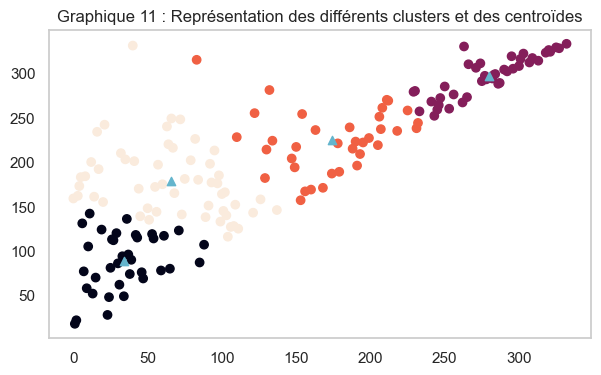

Inertie totale : 407803.22181112244


In [183]:
# Affichage du nuage de points (individus) en cluster avec les centoïdes (= point moyen) /11

fig = plt.figure(figsize=(7,4))
model = KMeans(n_clusters=4)
model.fit(Z)
model.predict(Z)
plt.scatter(Z[:,0], Z[:,1],c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='c')
plt.title('Graphique 11 : Représentation des différents clusters et des centroïdes')
plt.grid()
plt.show()
print('Inertie totale :', model.inertia_)

#### 3.2.3.Identification des clusters

In [214]:
data.head(3)

,Zone,Cluster,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),PC1,PC2
0,Afghanistan,3,2956.8,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,1.53,5.0,0.54,-3.368683,-0.623851
1,Afrique du Sud,1,14823.6,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,35.69,143.0,14.11,1.454366,-1.659100
2,Albanie,0,14229.3,80.851064,27.659574,-0.010270,1603.534,2884.169,0.37,16.36,85.0,6.26,0.381022,1.315476


In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Lire le fichier csv
data = pd.read_csv('Téléchargements.csv')

# Normalisation des données
X = data.drop(columns=['Zone']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer KMeans avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Réorganiser les colonnes pour déplacer 'Cluster' à côté de 'Zone'
cols = list(data.columns)
cols.insert(1, cols.pop(cols.index('Cluster')))
data = data[cols]

# Filtrer les pays appartenant à chaque cluster
cluster_1 = data[data['Cluster'] == 1]
cluster_2 = data[data['Cluster'] == 2]
cluster_3 = data[data['Cluster'] == 3]
cluster_4 = data[data['Cluster'] == 4]

# Afficher les tableaux récapitulatifs des pays pour chaque cluster
print("Cluster 1:")
print(cluster_1)

print("\nCluster 2:")
print(cluster_2)

print("\nCluster 3:")
print(cluster_3)

print("\nCluster 4:")
print(cluster_4)



Cluster 1:
                                                  Zone  Cluster           PIB  \
1                                       Afrique du Sud        1  14823.600000   
6                                   Antigua-et-Barbuda        1  26949.100000   
7                                      Arabie saoudite        1  48554.400000   
8                                            Argentine        1  28499.000000   
10                                           Australie        1  56028.400000   
13                                             Bahamas        1  32329.700000   
15                                             Barbade        1  17190.100000   
18                     Bolivie (État plurinational de)        1   9566.100000   
21                                              Brésil        1  17145.300000   
29                                              Canada        1  55589.800000   
30                                               Chili        1  28155.100000   
33               

#### 3.2.4. Comparaison des clusters

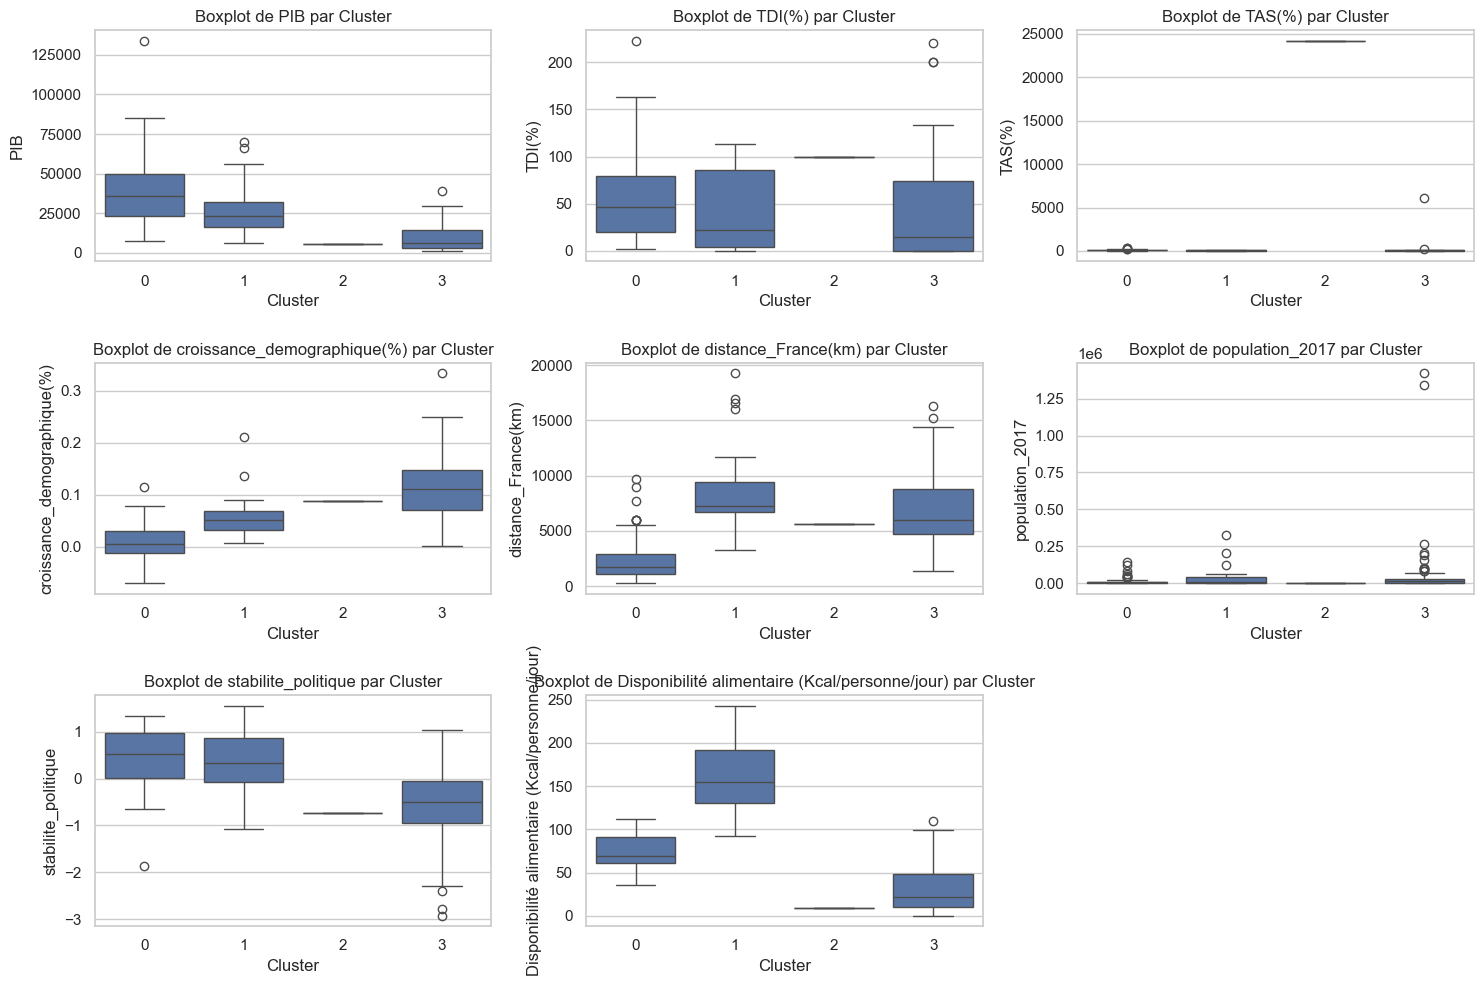

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Lire le fichier csv
data = pd.read_csv('Téléchargements.csv')

# Normalisation des données
X = data.drop(columns=['Zone']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer KMeans avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Réorganiser les colonnes pour déplacer 'Cluster' à côté de 'Zone'
cols = list(data.columns)
cols.insert(1, cols.pop(cols.index('Cluster')))
data = data[cols]

# Créer un boxplot pour chaque variable en fonction des clusters
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Liste des variables à visualiser
variables = ['PIB', 'TDI(%)', 'TAS(%)', 'croissance_demographique(%)', 'distance_France(km)', 'population_2017', 'stabilite_politique', 'Disponibilité alimentaire (Kcal/personne/jour)']

# Créer un subplot pour chaque variable
for i, var in enumerate(variables):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Cluster', y=var, data=data)
    plt.title(f'Boxplot de {var} par Cluster')

plt.tight_layout()
plt.show()


In [218]:
# Afficher les statistiques descriptives pour chaque cluster
for cluster in range(4):
    print(f"Cluster {cluster}:")
    print(data[data['Cluster'] == cluster].describe())
    print("\n")


Cluster 0:
       Cluster            PIB      TDI(%)      TAS(%)  \
count     45.0      45.000000   45.000000   45.000000   
mean       0.0   41226.763704   55.033438   96.599642   
std        0.0   23995.277212   43.853478   63.809887   
min        0.0    7376.800000    1.960784    0.000000   
25%        0.0   23294.500000   20.000000   65.789474   
50%        0.0   36011.800000   46.586345   94.444444   
75%        0.0   49829.600000   79.640719  112.105712   
max        0.0  133845.000000  222.368421  304.605263   

       croissance_demographique(%)  distance_France(km)  population_2017  \
count                    45.000000            45.000000        45.000000   
mean                      0.009434          2571.713441     19032.882168   
std                       0.036702          2326.892287     31570.879416   
min                      -0.070305           262.384500       334.393000   
25%                      -0.012358          1094.610000      2884.169000   
50%                

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Lire le fichier csv
data = pd.read_csv('Téléchargements.csv')

# Normalisation des données
X = data.drop(columns=['Zone']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer KMeans avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Réorganiser les colonnes pour déplacer 'Cluster' à côté de 'Zone'
cols = list(data.columns)
cols.insert(1, cols.pop(cols.index('Cluster')))
data = data[cols]

# Filtrer et trier les pays appartenant au cluster 1 par ordre décroissant de TDI(%)
cluster_1 = data[data['Cluster'] == 0].sort_values(by='TDI(%)', ascending=False)

# Afficher le tableau récapitulatif des pays pour le cluster 1 trié par TDI(%)
print("Cluster 1 trié par TDI(%):")
# Afficher les lignes 5 à 10 du DataFrame
cluster_1.head(10)





Cluster 1 trié par TDI(%):


,Zone,Cluster,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
16,Belgique,0,60044.600000,222.368421,304.605263,0.030165,262.384500,11419.748000,0.420000,12.65,44.0,4.57
113,Pays-Bas,0,22977.733333,163.440860,295.698925,0.071499,6031.922414,43489.162569,-0.083916,20.33,70.0,8.48
26,Cabo Verde,0,7376.800000,120.000000,10.000000,0.063857,4452.386000,537.498000,0.760000,17.62,62.0,6.52
79,Lettonie,0,33126.800000,104.878049,80.487805,-0.056993,1704.598000,1951.097000,0.450000,20.89,72.0,7.22
83,Luxembourg,0,133845.000000,100.000000,0.000000,0.115008,289.102300,591.910000,1.310000,18.33,69.0,7.19
84,Macédoine du Nord,0,18709.200000,97.560976,4.878049,0.003721,1672.040000,2081.996000,-0.260000,19.73,68.0,7.01
37,Cuba,0,22977.733333,91.228070,8.479532,0.007298,7729.485000,11339.254000,0.640000,23.72,82.0,7.12
136,Slovaquie,0,35039.600000,85.135135,95.945946,0.006096,1094.610000,5447.900000,0.900000,13.90,48.0,4.74
58,Géorgie,0,16401.700000,83.606557,36.065574,-0.013629,3373.349000,4008.716000,-0.380000,15.27,51.0,5.19
2,Albanie,0,14229.300000,80.851064,27.659574,-0.010270,1603.534000,2884.169000,0.370000,16.36,85.0,6.26


In [234]:
# Filtrer et trier les pays appartenant au cluster 2 par ordre décroissant de TDI(%)
cluster_2 = data[data['Cluster'] == 1].sort_values(by='TDI(%)', ascending=False)

# Afficher le tableau récapitulatif des pays pour le cluster 2 trié par TDI(%)
print("Cluster 2 trié par TDI(%):")
cluster_2.head(10)


Cluster 2 trié par TDI(%):


,Zone,Cluster,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
132,Samoa,1,6884.400000,113.333333,0.000000,0.033122,16011.920000,195.352000,1.160000,64.77,217.0,21.88
130,Saint-Vincent-et-les Grenadines,1,15374.600000,112.500000,0.000000,0.012837,6989.701000,109.827000,0.870000,72.31,243.0,25.10
163,Émirats arabes unis,1,70048.500000,105.097087,11.650485,0.037806,5249.535000,9487.203000,0.600000,43.47,147.0,14.80
6,Antigua-et-Barbuda,1,26949.100000,100.000000,0.000000,0.055492,6708.770000,95.426000,0.730000,54.10,233.0,17.77
129,Saint-Kitts-et-Nevis,1,29272.100000,100.000000,0.000000,0.043258,6760.687000,52.045000,0.630000,55.77,190.0,19.22
116,Polynésie française,1,22977.733333,100.000000,6.666667,0.071499,6031.922414,43489.162569,-0.083916,47.40,167.0,16.20
41,Dominique,1,15285.200000,100.000000,0.000000,0.006947,6826.396000,71.458000,1.170000,35.19,150.0,11.52
13,Bahamas,1,32329.700000,92.307692,23.076923,0.049977,7209.450000,381.755000,0.980000,43.17,182.0,14.61
131,Sainte-Lucie,1,23300.100000,90.909091,9.090909,0.024388,6903.772000,180.954000,0.970000,56.69,241.0,19.00
52,Grenade,1,15562.300000,87.500000,12.500000,0.031904,7120.287000,110.874000,0.990000,45.70,192.0,15.50


In [235]:
# Filtrer et trier les pays appartenant au cluster 3 par ordre décroissant de TDI(%)
cluster_3 = data[data['Cluster'] == 2].sort_values(by='TDI(%)', ascending=False)

# Afficher le tableau récapitulatif des pays pour le cluster 3 trié par TDI(%)
print("Cluster 3 trié par TDI(%):")
cluster_3.head(10)


Cluster 3 trié par TDI(%):


,Zone,Cluster,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
40,Djibouti,2,5474.6,100.0,24173.015873,0.0875,5595.459,944.099,-0.73,2.68,9.0,0.92


In [237]:
# Filtrer et trier les pays appartenant au cluster 4 par ordre décroissant de TDI(%)
cluster_4 = data[data['Cluster'] == 3].sort_values(by='TDI(%)', ascending=False)

# Afficher le tableau récapitulatif des pays pour le cluster 4 trié par TDI(%)
print("Cluster 4 trié par TDI(%):")
cluster_4.head(20)


Cluster 4 trié par TDI(%):


,Zone,Cluster,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
148,Timor-Leste,3,4347.9,220.000000,20.000000,0.097321,6031.922414,1243.258,0.07,4.24,14.0,1.46
167,Îles Salomon,3,2896.7,200.000000,0.000000,0.143825,15178.200000,636.039,0.19,4.45,18.0,1.51
50,Gambie,3,2502.5,200.000000,25.000000,0.162139,4308.250000,2213.889,-0.09,3.53,12.0,1.24
156,Vanuatu,3,3344.9,133.333333,33.333333,0.144333,16346.350000,285.510,0.68,11.66,40.0,4.05
95,Mongolie,3,14647.5,111.111111,0.000000,0.102343,7053.423000,3113.786,0.78,2.77,9.0,0.95
107,Oman,3,38844.3,110.526316,6.140351,0.333873,5620.005000,4665.928,0.75,21.63,73.0,7.38
93,Mauritanie,3,6124.2,109.090909,22.727273,0.155404,3794.960000,4282.570,-0.63,5.14,11.0,1.59
99,Namibie,3,12147.4,103.571429,39.285714,0.094702,8084.970000,2402.633,0.62,11.53,40.0,4.25
133,Sao Tomé-et-Principe,3,5492.9,100.000000,50.000000,0.099175,5432.882000,207.089,0.18,9.47,33.0,3.21
88,Maldives,3,19332.6,100.000000,6043.253968,0.249637,8294.178000,496.402,0.22,13.50,47.0,4.70


## 4 Analyse du cluster 4

In [532]:
# Affichage

#cluster4.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Afghanistan,2956.8,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,5.0,4
Afrique du Sud,14823.6,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,143.0,4
Algérie,13805.4,0.722022,99.277978,0.107140,1340.390,41389.189,-0.92,22.0,4
Argentine,28499.0,0.407747,110.142712,0.052256,11072.250,43937.140,0.16,182.0,4
Australie,56028.4,1.366354,108.368915,0.073379,16975.460,24584.620,0.88,192.0,4


In [ ]:
### 4.1 Affichage des individus en 2D (2PCP)

In [533]:
# Suppression d'une colonne

#cluster4 = cluster4.drop(columns = ['Groupe'])

In [534]:
#cluster4.T

Zone,Afghanistan,Afrique du Sud,Algérie,Argentine,Australie,Azerbaïdjan,Bangladesh,Barbade,Belize,Bolivie (État plurinational de),...,Uruguay,Venezuela (République bolivarienne du),Viet Nam,Yémen,Zambie,Zimbabwe,Égypte,Équateur,États-Unis d'Amérique,Éthiopie
PIB,2956.800000,14823.600000,13805.400000,28499.000000,56028.400000,19676.000000,6020.300000,17190.100000,11523.000000,9566.100000,...,29662.100000,22977.733333,10405.400000,22977.733333,3642.400000,3611.800000,14280.900000,14552.400000,66105.700000,2253.000000
TDI(%),50.877193,24.268178,0.722022,0.407747,1.366354,20.930233,0.000000,11.764706,0.000000,0.233100,...,9.090909,3.993610,24.129353,31.707317,20.000000,7.894737,8.800000,0.000000,0.673382,7.142857
TAS(%),49.122807,78.706327,99.277978,110.142712,108.368915,80.620155,99.600000,88.235294,105.263158,124.242424,...,100.000000,95.846645,76.119403,68.292683,81.666667,90.789474,89.440000,99.706745,119.971532,100.000000
croissance_demographique(%),0.164779,0.079063,0.107140,0.052256,0.073379,0.062671,0.057479,0.008921,0.111743,0.078551,...,0.017066,0.001418,0.053437,0.137360,0.165117,0.085508,0.115946,0.084739,0.035157,0.147454
distance_France(km),5590.381000,9353.552000,1340.390000,11072.250000,16975.460000,3817.547000,7916.790000,6882.340000,8664.439000,10038.450000,...,10972.420000,7618.860000,9208.554000,5317.261000,7604.841000,7949.676000,3215.215000,9367.098000,6031.922414,5582.502000
population_2017,36296.113000,57009.756000,41389.189000,43937.140000,24584.620000,9845.320000,159685.424000,286.232000,375.769000,11192.855000,...,3436.641000,29402.484000,94600.648000,27834.819000,16853.599000,14236.595000,96442.591000,16785.361000,325084.756000,106399.924000
stabilite_politique,-2.790000,-0.280000,-0.920000,0.160000,0.880000,-0.750000,-1.250000,0.950000,0.030000,-0.280000,...,1.040000,-1.250000,0.210000,-2.930000,0.140000,-0.710000,-1.430000,-0.080000,0.260000,-1.680000
disponibilite_alimentaire,5.000000,143.000000,22.000000,182.000000,192.000000,44.000000,7.000000,199.000000,110.000000,155.000000,...,33.000000,71.000000,48.000000,30.000000,11.000000,16.000000,50.000000,83.000000,219.000000,0.000000


In [535]:
# Renommer

#groupe2 = cluster4
#groupe2.shape

(86, 8)

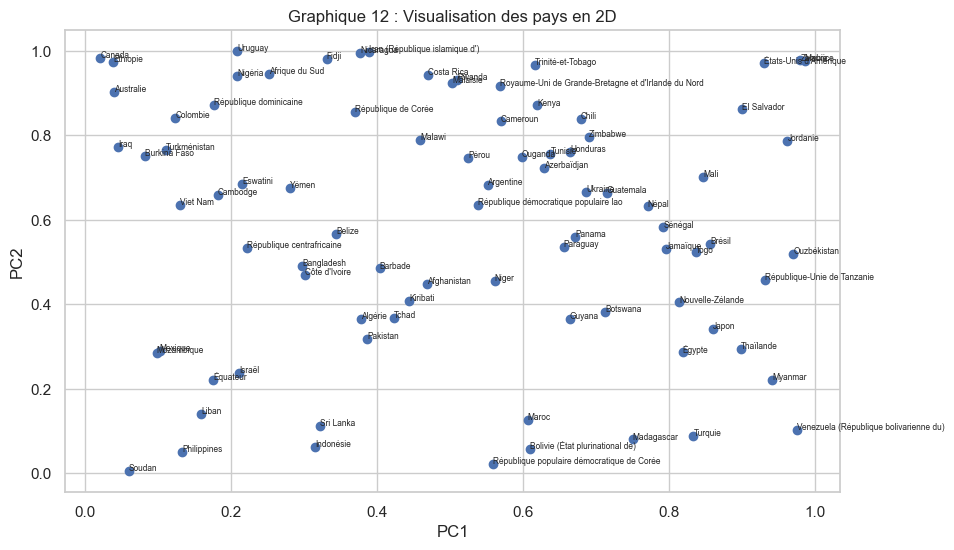

In [536]:
# Projection de X sur les composantes principales
# Assurez-vous que X_projection est un tableau numpy avec deux dimensions

#X_projected2 = np.random.rand(len(groupe2), 2)
# Création de la figure et du scatter plot
#plt.figure(figsize=(10, 6))
#plt.scatter(X_projected2[:, 0], X_projected2[:, 1])

# Ajout des annotations

#for (x, y), label in zip(X_projected2, groupe2.index):
    #plt.text(x, y, label, fontsize=6)
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Graphique 12 : Visualisation des pays en 2D')
#plt.show()

In [ ]:
### 4.2 Nouvelle itération : Coude et Silhouette

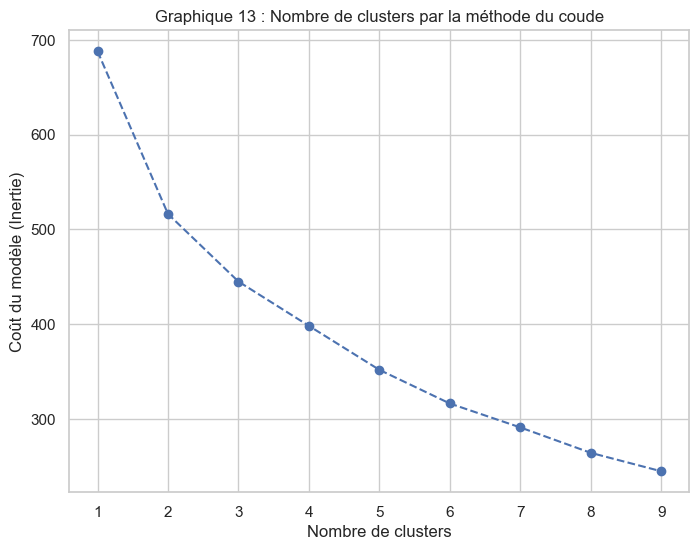

In [537]:
# Recherche du nombre de clusters par la méthode du coude

#Y = groupe2.values

# centrer et réduire les données
#std_scale2 = preprocessing.StandardScaler().fit(Y)
#X_scaled2 = std_scale2.transform(Y)

# création d'une Matrice des liens selon la Méthode de Ward
#Z2 = linkage(X_scaled2, method = 'ward', metric='euclidean')

# Recherche du nombre de clusters par la méthode du coude

#inertia2 = []
#k_range2 = range(1, 10)
#for k in k_range2:
    #model2 = KMeans(n_clusters=k, random_state=42).fit(X_scaled2)
    #inertia2.append(model2.inertia_)

# Affichage du graphique de la méthode du coude
#fig = plt.figure(figsize=(8, 6))
#plt.plot(k_range2, inertia2, marker='o', linestyle='--')
#plt.xlabel('Nombre de clusters')
#plt.ylabel('Coût du modèle (Inertie)')
#plt.title('Graphique 13 : Nombre de clusters par la méthode du coude')
#plt.grid(True)
#plt.show()

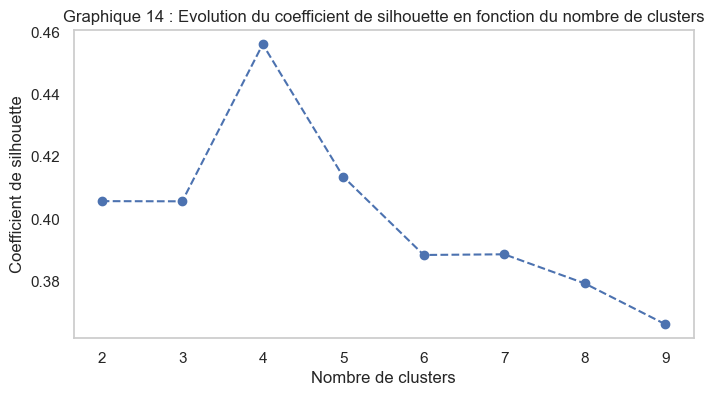

[0.4057223449696728,
 0.4056643175247188,
 0.45603990853035253,
 0.4135451558889696,
 0.3884563425154186,
 0.3886730722878118,
 0.3793264470006389,
 0.36623812723666616]

In [538]:
# Recherche du coefficient de silhouette

#X_projected2 = np.random.rand(len(groupe2), 2)
#tab_silhouette2 = []
#k_range2 = range(2, 10)
#for k in k_range2:
 #   model2 = KMeans(n_clusters=k)
  #  cluster_labels = model2.fit_predict(X_projected2)
   # silhouette_avg = silhouette_score(X_projected2, cluster_labels)
    #tab_silhouette2.append(silhouette_avg)

# Affichage du graphique du coefficient de silhouette
#fig = plt.figure(figsize=(8, 4))
#plt.plot(k_range2, tab_silhouette2, marker='o', linestyle='--')
#plt.xlabel('Nombre de clusters')
#plt.ylabel('Coefficient de silhouette')
#plt.title('Graphique 14 : Evolution du coefficient de silhouette en fonction du nombre de clusters')
#plt.grid()
#plt.show()

# Afficher les valeurs des coefficients de silhouette
#tab_silhouette2

In [ ]:
### 4.3 Représentations visuelles

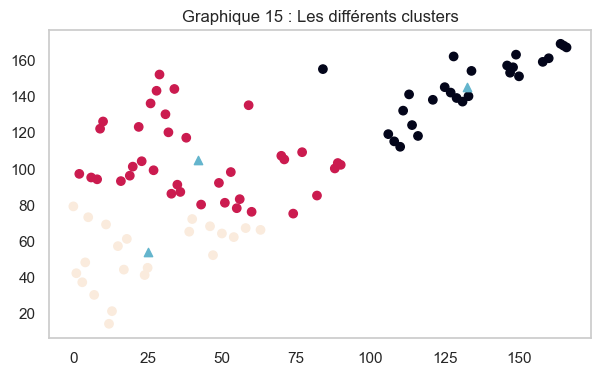

Inertie totale : 84373.15908699832


In [539]:
# Affichage du nuage de points (individus) en cluster avec les centoïdes (= point moyen) /11

#fig = plt.figure(figsize=(7,4))
#model2 = KMeans(n_clusters=3)
#model2.fit(Z2)
#model2.predict(Z2)
#plt.scatter(Z2[:,0], Z2[:,1],c=model2.predict(Z2))
#plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1], marker='^',c='c')
#plt.title('Graphique 15 : Les différents clusters')
#plt.grid()
#plt.show()
#print('Inertie totale :', model2.inertia_)

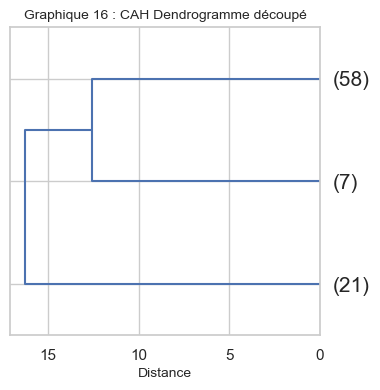

In [540]:
# Découpage du dendrogramme en groupes pour avoir une première idée du partitionnement

#fig = plt.figure(figsize=(4,4))
#plt.title('Graphique 16 : CAH Dendrogramme découpé', fontsize = 10)
#plt.xlabel('Distance', fontsize=10)
#dendrogram(Z2, labels = groupe2.index, p=3, truncate_mode='lastp', leaf_font_size=15, orientation='left')
#plt.show()

In [ ]:
### 4.4 Identification des nouveaux clusters

In [541]:
# Identification des clusters

#groupes_cah2 = fcluster(Z2, 3, criterion='maxclust')

# index triés des groupes
#idg2 = np.argsort(groupes_cah2)

# Affichage des pays selon leurs groupes
#df = pd.DataFrame(groupe2.index[idg2], groupes_cah2[idg2]).reset_index()
#df2 = df.rename(columns={'index':'Groupe'})
#df2.head()

,Groupe,Zone
0,1,Malaisie
1,1,Fidji
2,1,Panama
3,1,Israël
4,1,Costa Rica


In [542]:
# Intégration des références des groupes dans notre cluster

#dataf2 = pd.merge(groupe2, df2, on='Zone')
#dataf2.set_index('Zone', inplace=True)
#dataf2.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Afghanistan,2956.8,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,5.0,3
Afrique du Sud,14823.6,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,143.0,3
Algérie,13805.4,0.722022,99.277978,0.107140,1340.390,41389.189,-0.92,22.0,3
Argentine,28499.0,0.407747,110.142712,0.052256,11072.250,43937.140,0.16,182.0,1
Australie,56028.4,1.366354,108.368915,0.073379,16975.460,24584.620,0.88,192.0,1


In [543]:
# Nombre de pays par groupes

#dataf2["Groupe"].value_counts()

Groupe
3    58
1    21
2     7
Name: count, dtype: int64

In [544]:
# Cluster 1

#cluster_1 = dataf2.loc[dataf2['Groupe']==1]
#cluster_1.sort_values(by='TDI(%)', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Japon,44491.1,44.265010,91.718427,-0.007170,9725.629000,127502.725,1.10,67.0,1
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,53399.0,34.870188,81.199642,0.034128,6031.922414,66727.461,0.38,120.0,1
Trinité-et-Tobago,31763.7,30.263158,80.263158,0.029179,7225.325000,1384.059,0.27,189.0,1
Chili,28155.1,23.065476,105.952381,0.061498,11663.390000,18470.439,0.41,153.0,1
Jamaïque,9990.6,20.394737,84.210526,0.027696,7734.696000,2920.848,0.30,178.0,1
République de Corée,44928.1,16.042155,98.126464,0.020690,8981.467000,51096.415,0.38,62.0,1
Canada,55589.8,12.700628,98.883461,0.051832,6004.645000,36732.095,1.09,154.0,1
Costa Rica,22525.4,12.686567,99.253731,0.055878,8919.449000,4949.954,0.60,92.0,1
Barbade,17190.1,11.764706,88.235294,0.008921,6882.340000,286.232,0.95,199.0,1


In [545]:
# Cluster 2

#cluster_2 = dataf2.loc[dataf2['Groupe']==2]
#cluster_2.sort_values(by='TDI(%)', ascending = False)


,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
États-Unis d'Amérique,66105.7,0.673382,119.971532,0.035157,6031.922414,325084.756,0.26,219.0,2
Thaïlande,20159.5,0.227015,190.238365,0.020253,9454.805000,69209.810,-0.75,47.0,2
Pakistan,5191.9,0.156006,99.921997,0.110135,5932.586000,207906.209,-2.40,20.0,2
Indonésie,11899.3,0.043048,99.052949,0.065201,11584.250000,264650.963,-0.50,25.0,2
Brésil,17145.3,0.030054,142.266079,0.042885,9408.406000,207833.823,-0.48,204.0,2
Bangladesh,6020.3,0.000000,99.600000,0.057479,7916.790000,159685.424,-1.25,7.0,2
Nigéria,5849.1,0.000000,99.504950,0.141390,4722.149000,190873.244,-2.00,2.0,2


In [546]:
# Cluster 3

#cluster_3 = dataf2.loc[dataf2['Groupe']==3]
#cluster_3.sort_values(by='TDI(%)', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Iraq,14166.500000,83.038869,16.961131,0.177572,3867.434000,37552.781,-2.30,52.0,3
Afghanistan,2956.800000,50.877193,49.122807,0.164779,5590.381000,36296.113,-2.79,5.0,3
Kiribati,2174.700000,50.000000,50.000000,0.073216,14371.470000,114.158,0.86,63.0,3
Botswana,16372.100000,42.857143,71.428571,0.081157,8522.764000,2205.080,1.01,12.0,3
République centrafricaine,1059.000000,36.363636,63.636364,0.035977,5186.042000,4596.023,-1.99,8.0,3
Guatemala,11285.900000,36.134454,65.826331,0.107670,9001.048000,16914.970,-0.65,71.0,3
Turkménistan,22977.733333,33.333333,74.074074,0.092972,4581.080000,5757.667,-0.13,15.0,3
Yémen,22977.733333,31.707317,68.292683,0.137360,5317.261000,27834.819,-2.93,30.0,3
Togo,2476.900000,29.629630,74.074074,0.136506,4753.381000,7698.474,-0.87,24.0,3


In [ ]:
### 4.5 Comparaison des sous-groupes

In [547]:
# Comparaison des groupes : Afficher les moyennes des variables de chaque groupe

#groupe=(1,2,3)
#for n in groupe:
 #   affi=dataf2.loc[dataf2['Groupe']==n].mean()
  #  print(affi)

PIB                            31085.804762
TDI(%)                            12.341794
TAS(%)                            99.305211
croissance_demographique(%)        0.043140
distance_France(km)             9733.197401
population_2017                21657.574524
stabilite_politique                0.480476
disponibilite_alimentaire        139.142857
Groupe                             1.000000
dtype: float64
PIB                             18910.157143
TDI(%)                              0.161358
TAS(%)                            121.507982
croissance_demographique(%)         0.067500
distance_France(km)              7864.415488
population_2017                203606.318429
stabilite_politique                -1.017143
disponibilite_alimentaire          74.857143
Groupe                              2.000000
dtype: float64
PIB                             9596.747126
TDI(%)                            13.560523
TAS(%)                            90.494384
croissance_demographique(%)        0.

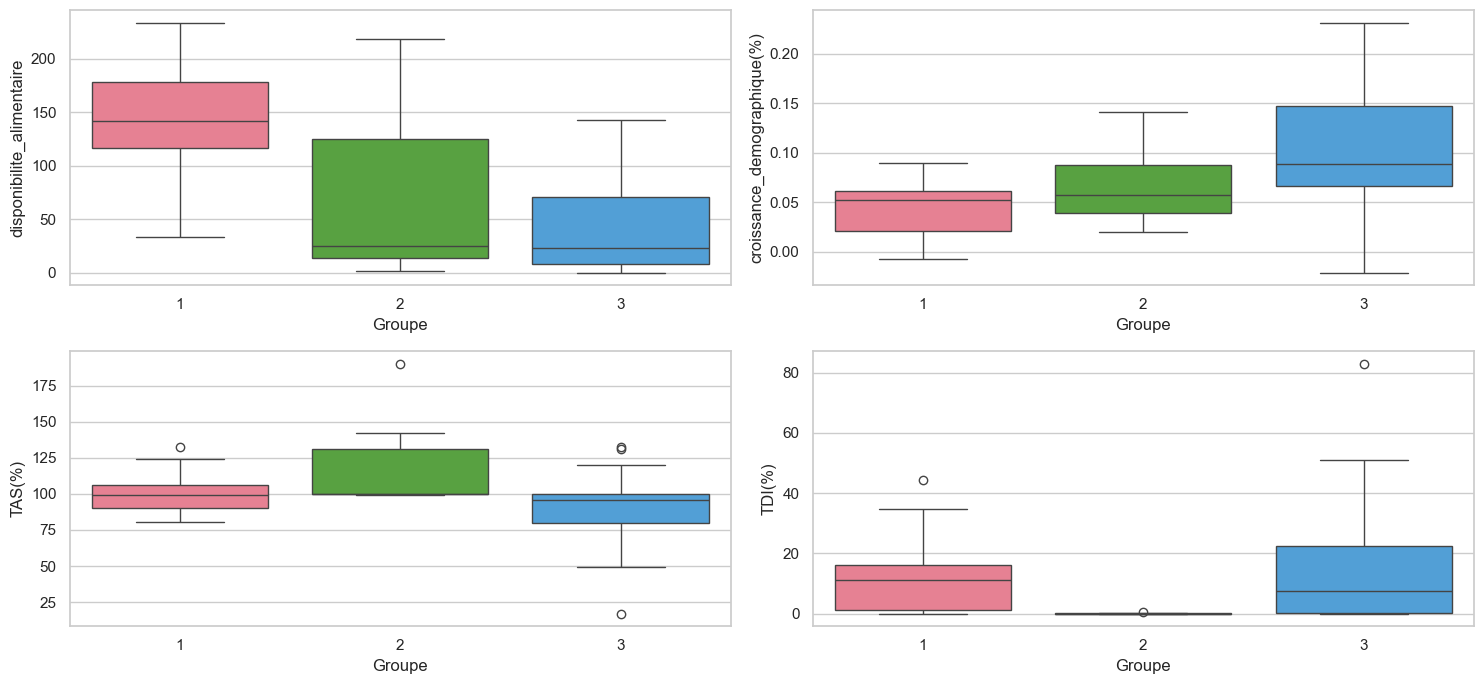

In [548]:
# Comparaison visuelle des Box-plots des variables des clusters

#plt.figure(figsize=(15, 7))
#sns.set(style="whitegrid")

# Définir une palette de couleurs
#palette = sns.color_palette("husl", len(dataf2['Groupe'].unique()))

# Premier subplot
#plt.subplot(221)
#sns.boxplot(data=dataf2, x='Groupe', y='disponibilite_alimentaire', palette=palette)

# Deuxième subplot
#plt.subplot(222)
#sns.boxplot(data=dataf2, x='Groupe', y='croissance_demographique(%)', palette=palette)

# Troisième subplot
#plt.subplot(223)
#sns.boxplot(data=dataf2, x='Groupe', y='TAS(%)', palette=palette)

# Quatrième subplot
#plt.subplot(224)
#sns.boxplot(data=dataf2, x='Groupe', y='TDI(%)', palette=palette)

# Ajuster l'espacement entre les subplots
#plt.tight_layout()
# Afficher le graphique
#plt.show()

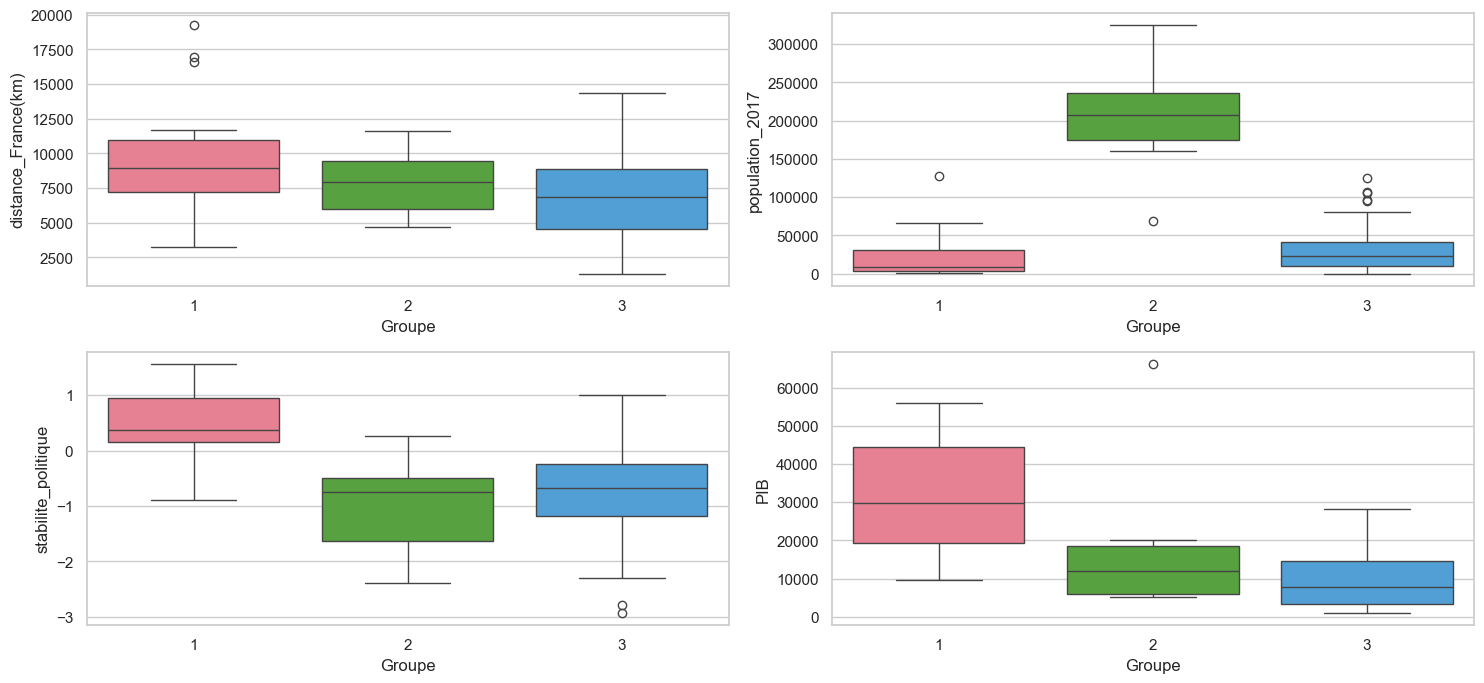

In [549]:
# Comparaison visuelle des Box-plots des variables des clusters

#plt.figure(figsize=(15, 7))
#sns.set(style="whitegrid")

# Définir une palette de couleurs
#palette = sns.color_palette("husl", len(dataf2['Groupe'].unique()))

# Premier subplot
#plt.subplot(221)
#sns.boxplot(data=dataf2, x='Groupe', y='distance_France(km)', palette=palette)

# Deuxième subplot
#plt.subplot(222)
#sns.boxplot(data=dataf2, x='Groupe', y='population_2017', palette=palette)

# Troisième subplot
#plt.subplot(223)
#sns.boxplot(data=dataf2, x='Groupe', y='stabilite_politique', palette=palette)

# Quatrième subplot
#plt.subplot(224)
#sns.boxplot(data=dataf2, x='Groupe', y='PIB', palette=palette)

# Ajuster l'espacement entre les subplots
#plt.tight_layout()

# Afficher le graphique
#plt.show()

In [ ]:
## 5 Analyse du sous cluster_3

In [550]:
# Suppression d'une colonne

#cluster_3 = cluster_3.drop(columns = ['Groupe'])

In [551]:
# Renommer

#groupe3 = cluster_3
#groupe3.shape

(58, 8)

In [552]:
# Affichage

#groupe3.T

Zone,Afghanistan,Afrique du Sud,Algérie,Azerbaïdjan,Belize,Botswana,Burkina Faso,Cambodge,Cameroun,Colombie,...,Turquie,Ukraine,Venezuela (République bolivarienne du),Viet Nam,Yémen,Zambie,Zimbabwe,Égypte,Équateur,Éthiopie
PIB,2956.800000,14823.600000,13805.400000,19676.000000,11523.000000,16372.100000,2243.200000,4258.900000,4744.000000,17195.100000,...,28118.000000,16523.500000,22977.733333,10405.400000,22977.733333,3642.400000,3611.800000,14280.900000,14552.400000,2253.000000
TDI(%),50.877193,24.268178,0.722022,20.930233,0.000000,42.857143,0.000000,26.315789,0.000000,4.747413,...,0.179211,11.992071,3.993610,24.129353,31.707317,20.000000,7.894737,8.800000,0.000000,7.142857
TAS(%),49.122807,78.706327,99.277978,80.620155,105.263158,71.428571,100.000000,73.684211,98.780488,95.191722,...,130.943847,120.019822,95.846645,76.119403,68.292683,81.666667,90.789474,89.440000,99.706745,100.000000
croissance_demographique(%),0.164779,0.079063,0.107140,0.062671,0.111743,0.081157,0.158225,0.083147,0.143392,0.061510,...,0.086608,-0.021254,0.001418,0.053437,0.137360,0.165117,0.085508,0.115946,0.084739,0.147454
distance_France(km),5590.381000,9353.552000,1340.390000,3817.547000,8664.439000,8522.764000,4082.870000,9947.790000,5085.718000,8707.677000,...,6031.922414,2025.144000,7618.860000,9208.554000,5317.261000,7604.841000,7949.676000,3215.215000,9367.098000,5582.502000
population_2017,36296.113000,57009.756000,41389.189000,9845.320000,375.769000,2205.080000,19193.234000,16009.409000,24566.073000,48909.839000,...,81116.450000,44487.709000,29402.484000,94600.648000,27834.819000,16853.599000,14236.595000,96442.591000,16785.361000,106399.924000
stabilite_politique,-2.790000,-0.280000,-0.920000,-0.750000,0.030000,1.010000,-0.930000,0.090000,-1.090000,-0.780000,...,-1.790000,-1.870000,-1.250000,0.210000,-2.930000,0.140000,-0.710000,-1.430000,-0.080000,-1.680000
disponibilite_alimentaire,5.000000,143.000000,22.000000,44.000000,110.000000,12.000000,8.000000,11.000000,11.000000,111.000000,...,71.000000,78.000000,71.000000,48.000000,30.000000,11.000000,16.000000,50.000000,83.000000,0.000000


In [ ]:
### 5.1 Nouvelle itération : Coude et Silhouette

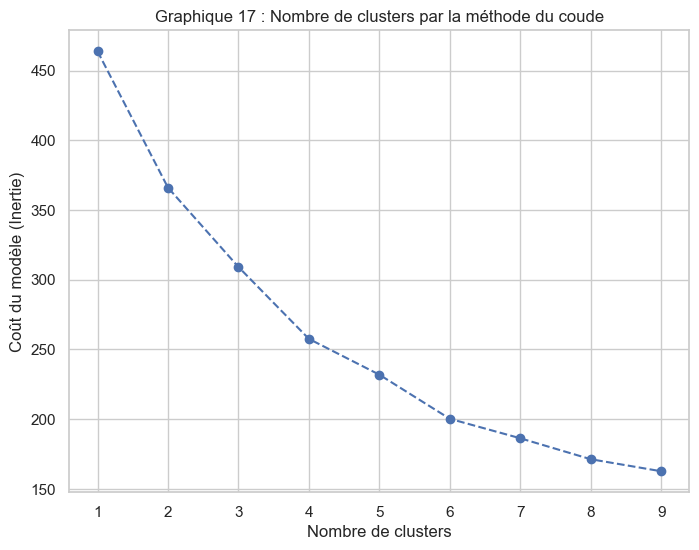

In [553]:
# Recherche du nombre de clusters par la méthode du coude

#W = groupe3.values

# centrer et réduire les données
#std_scale3 = preprocessing.StandardScaler().fit(W)
#X_scaled3 = std_scale3.transform(W)

# création d'une Matrice des liens selon la Méthode de Ward
#Z3 = linkage(X_scaled3, method = 'ward', metric='euclidean')

# Recherche du nombre de clusters par la méthode du coude

#inertia3 = []
#k_range3 = range(1, 10)
#for k in k_range3:
  #  model3 = KMeans(n_clusters=k, random_state=42).fit(X_scaled3)
 #   inertia3.append(model3.inertia_)

# Affichage du graphique de la méthode du coude
#fig = plt.figure(figsize=(8, 6))
#plt.plot(k_range3, inertia3, marker='o', linestyle='--')
#plt.xlabel('Nombre de clusters')
#plt.ylabel('Coût du modèle (Inertie)')
#plt.title('Graphique 17 : Nombre de clusters par la méthode du coude')
#plt.grid(True)
#plt.show()

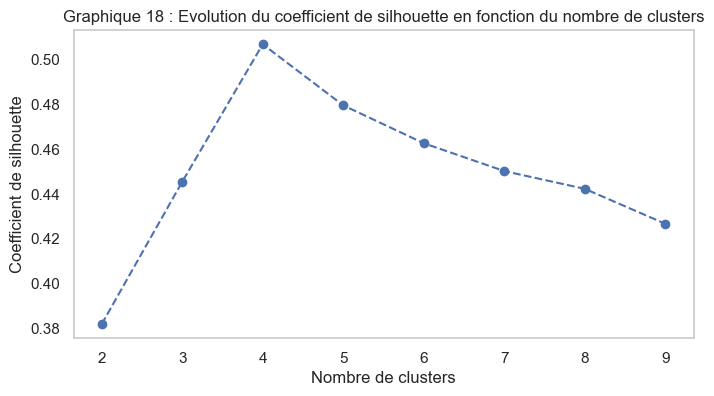

[0.38182515777782833,
 0.44537386557288705,
 0.506758614184715,
 0.4794913611999364,
 0.4625903778580409,
 0.4501697555963708,
 0.44224875520228013,
 0.4266449196036336]

In [574]:
# Recherche du coefficient de silhouette

#X_projected3 = np.random.rand(len(groupe3), 2)

#tab_silhouette3 = []
#k_range3 = range(2, 10)
#for k in k_range3:
 #   model3 = KMeans(n_clusters=k)
  #  cluster_labels = model3.fit_predict(X_projected3)
   # silhouette_avg3 = silhouette_score(X_projected3, cluster_labels)
    #tab_silhouette3.append(silhouette_avg3)

# Affichage du graphique du coefficient de silhouette
#fig = plt.figure(figsize=(8, 4))
#plt.plot(k_range3, tab_silhouette3, marker='o', linestyle='--')
#plt.xlabel('Nombre de clusters')
#plt.ylabel('Coefficient de silhouette')
#plt.title('Graphique 18 : Evolution du coefficient de silhouette en fonction du nombre de clusters')
#plt.grid()
#plt.show()

# Afficher les valeurs des coefficients de silhouette
#tab_silhouette3

In [ ]:
### 5.2 Réprésentations visuelles

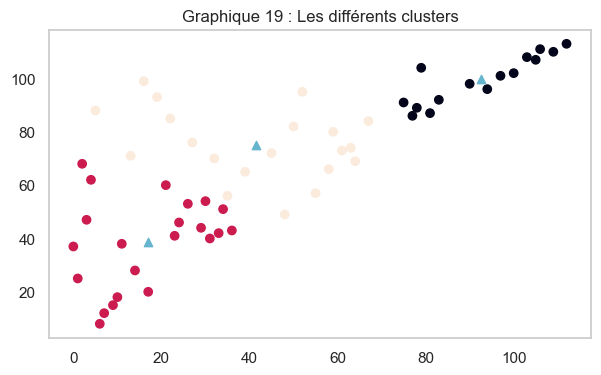

Inertie totale : 84373.15908699832


In [575]:
# Affichage du nuage de points (individus) en cluster avec les centoïdes (= point moyen) /11

#fig = plt.figure(figsize=(7,4))
#model3 = KMeans(n_clusters=3)
#model3.fit(Z3)
#model3.predict(Z3)
#plt.scatter(Z3[:,0], Z3[:,1],c=model3.predict(Z3))
#plt.scatter(model3.cluster_centers_[:,0], model3.cluster_centers_[:,1], marker='^',c='c')
#plt.title('Graphique 19 : Les différents clusters')
#plt.grid()
#plt.show()
#print('Inertie totale :', model2.inertia_)

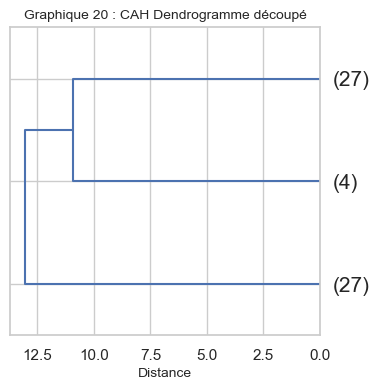

In [576]:
# Découpage du dendrogramme en groupes pour avoir une première idée du partitionnement

#fig = plt.figure(figsize=(4,4))
#plt.title('Graphique 20 : CAH Dendrogramme découpé', fontsize = 10)
#plt.xlabel('Distance', fontsize=10)
#dendrogram(Z3, labels = groupe3.index, p=3, truncate_mode='lastp', leaf_font_size=15, orientation='left')
#plt.show()

In [ ]:
### 5.3 Identification des nouveaux clusters


In [557]:
# Identification des nouveaux clusters

#groupes_cah3 = fcluster(Z3, 3, criterion='maxclust')

# index triés des groupes
#idg3 = np.argsort(groupes_cah3)

# Affichage des pays selon leurs groupes

#df = pd.DataFrame(groupe3.index[idg3], groupes_cah3[idg3]).reset_index()
#df3 = df.rename(columns={'index':'Groupe'})
#df3.shape

(58, 2)

In [558]:
# Jointure goupe3 et df3

#dataf3 = pd.merge(groupe3, df3, on ='Zone')
#dataf3.set_index('Zone', inplace=True)
#dataf3.shape

(58, 9)

In [559]:
# Affichage

#dataf3.head()

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Afghanistan,2956.8,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,5.0,2
Afrique du Sud,14823.6,24.268178,78.706327,0.079063,9353.552,57009.756,-0.28,143.0,1
Algérie,13805.4,0.722022,99.277978,0.107140,1340.390,41389.189,-0.92,22.0,3
Azerbaïdjan,19676.0,20.930233,80.620155,0.062671,3817.547,9845.320,-0.75,44.0,3
Belize,11523.0,0.000000,105.263158,0.111743,8664.439,375.769,0.03,110.0,1


In [560]:
# Nombre de pays par groupe

#dataf3['Groupe'].value_counts()

Groupe
1    27
3    27
2     4
Name: count, dtype: int64

In [561]:
# Identification des différents clusters
# Cluster01

#cluster01 = dataf3.loc[dataf3['Groupe']==1]
#cluster01

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Afrique du Sud,14823.600000,24.268178,78.706327,0.079063,9353.552000,57009.756,-0.28,143.0,1
Belize,11523.000000,0.000000,105.263158,0.111743,8664.439000,375.769,0.03,110.0,1
Botswana,16372.100000,42.857143,71.428571,0.081157,8522.764000,2205.080,1.01,12.0,1
Cambodge,4258.900000,26.315789,73.684211,0.083147,9947.790000,16009.409,0.09,11.0,1
Colombie,17195.100000,4.747413,95.191722,0.061510,8707.677000,48909.839,-0.78,111.0,1
El Salvador,10184.000000,12.213740,103.816794,0.024079,8984.298000,6388.126,-0.26,71.0,1
Eswatini,9222.600000,28.571429,85.714286,0.042173,8846.426000,1124.805,-0.27,22.0,1
Guatemala,11285.900000,36.134454,65.826331,0.107670,9001.048000,16914.970,-0.65,71.0,1
Honduras,6145.500000,5.853659,94.146341,0.091234,8810.234000,9429.013,-0.57,93.0,1


In [562]:
# Cluster02

#cluster02 = dataf3.loc[dataf3['Groupe']==2]
#cluster02

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Afghanistan,2956.800000,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,5.0,2
Iraq,14166.500000,83.038869,16.961131,0.177572,3867.434,37552.781,-2.30,52.0,2
République centrafricaine,1059.000000,36.363636,63.636364,0.035977,5186.042,4596.023,-1.99,8.0,2
Yémen,22977.733333,31.707317,68.292683,0.137360,5317.261,27834.819,-2.93,30.0,2


In [563]:
# Cluster03

#cluster03 = dataf3.loc[dataf3['Groupe']==3]
#cluster03

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire,Groupe
Zone,,,,,,,,,
Algérie,13805.400000,0.722022,99.277978,0.107140,1340.390000,41389.189,-0.92,22.0,3
Azerbaïdjan,19676.000000,20.930233,80.620155,0.062671,3817.547000,9845.320,-0.75,44.0,3
Burkina Faso,2243.200000,0.000000,100.000000,0.158225,4082.870000,19193.234,-0.93,8.0,3
Cameroun,4744.000000,0.000000,98.780488,0.143392,5085.718000,24566.073,-1.09,11.0,3
Côte d'Ivoire,5851.400000,10.769231,89.230769,0.134137,6031.922414,24437.470,-1.09,8.0,3
Jordanie,9357.000000,23.272727,76.363636,0.209628,3371.398000,9785.843,-0.43,98.0,3
Kenya,4871.600000,0.000000,100.000000,0.132549,6491.402000,50221.142,-1.13,2.0,3
Liban,16262.900000,17.808219,87.671233,0.231465,3197.032000,6819.373,-1.62,38.0,3
Madagascar,1715.200000,0.000000,98.780488,0.144266,8763.332000,25570.512,-0.30,14.0,3


In [ ]:
### 5.4 Comparaison des sous-groupes


In [564]:
# Afficher les moyennes des variables de chaque groupe
# Comparaison des moyennes des variables

#groupe = (1,2,3)
#for n in groupe:
 #   moyenne = dataf3.loc[dataf3['Groupe']==n].mean()
  #  print(moyenne)

PIB                            12830.146914
TDI(%)                            12.992808
TAS(%)                            92.934030
croissance_demographique(%)        0.067075
distance_France(km)             8482.992105
population_2017                40367.772000
stabilite_politique               -0.489630
disponibilite_alimentaire         64.555556
Groupe                             1.000000
dtype: float64
PIB                            10290.008333
TDI(%)                            50.496754
TAS(%)                            49.503246
croissance_demographique(%)        0.128922
distance_France(km)             4990.279500
population_2017                26569.934000
stabilite_politique               -2.502500
disponibilite_alimentaire         23.750000
Groupe                             2.000000
dtype: float64
PIB                             6260.641975
TDI(%)                             8.656204
TAS(%)                            94.127499
croissance_demographique(%)        0.135217
di

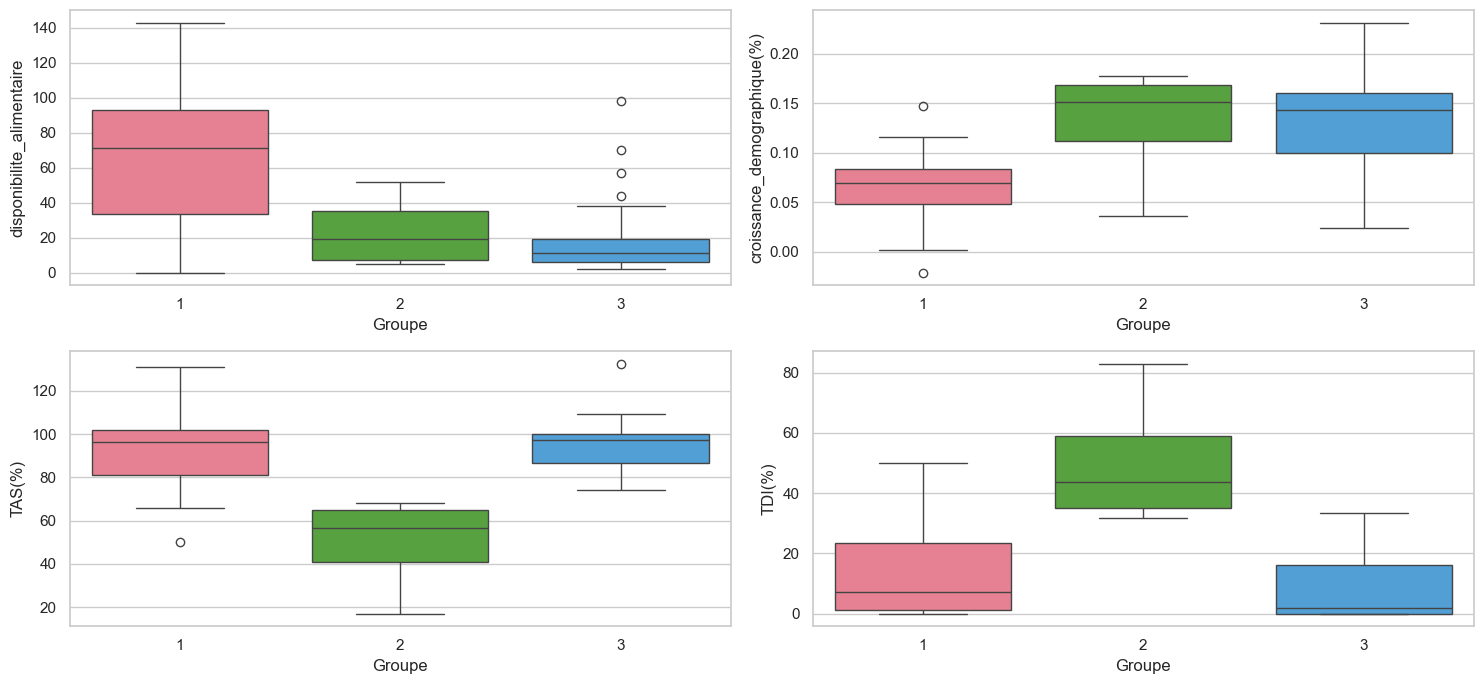

In [565]:
# Comparaison visuelle des clusters par des Boxplots

#plt.figure(figsize=(15, 7))
#sns.set(style="whitegrid")

# Définir une palette de couleurs
#palette = sns.color_palette("husl", len(dataf3['Groupe'].unique()))

# Premier subplot
#plt.subplot(221)
#sns.boxplot(data=dataf3, x='Groupe', y='disponibilite_alimentaire', palette=palette)

# Deuxième subplot
#plt.subplot(222)
#sns.boxplot(data=dataf3, x='Groupe', y='croissance_demographique(%)', palette=palette)

# Troisième subplot
#plt.subplot(223)
#sns.boxplot(data=dataf3, x='Groupe', y='TAS(%)', palette=palette)

# Quatrième subplot
#plt.subplot(224)
#sns.boxplot(data=dataf3, x='Groupe', y='TDI(%)', palette=palette)

# Ajuster l'espacement entre les subplots
#plt.tight_layout()

# Afficher le graphique
#plt.show()

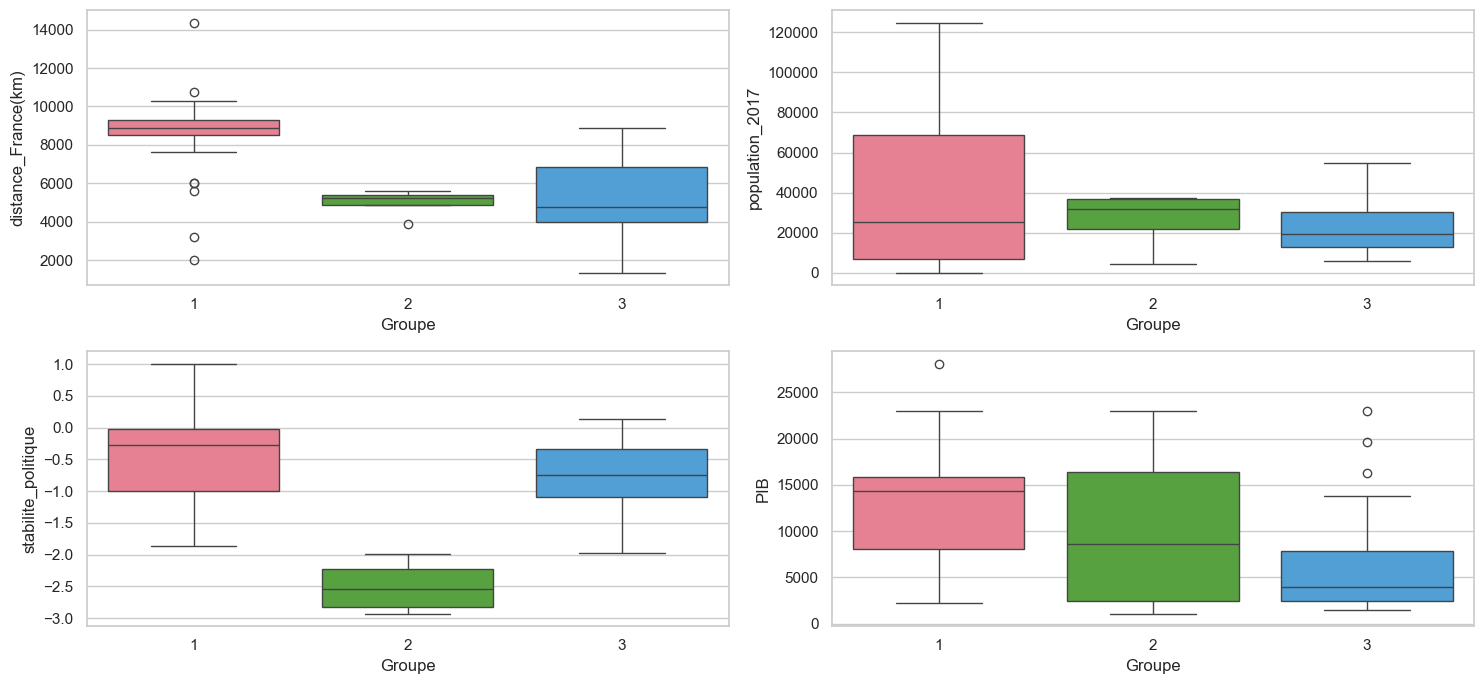

In [566]:
# Comparaison visuelle des Box-plots des variables des clusters

#plt.figure(figsize=(15, 7))
#sns.set(style="whitegrid")

# Définir une palette de couleurs
#palette = sns.color_palette("husl", len(dataf3['Groupe'].unique()))

# Premier subplot
#plt.subplot(221)
#sns.boxplot(data=dataf3, x='Groupe', y='distance_France(km)', palette=palette)

# Deuxième subplot
#plt.subplot(222)
#sns.boxplot(data=dataf3, x='Groupe', y='population_2017', palette=palette)

# Troisième subplot
#plt.subplot(223)
#sns.boxplot(data=dataf3, x='Groupe', y='stabilite_politique', palette=palette)

# Quatrième subplot
#plt.subplot(224)
#sns.boxplot(data=dataf3, x='Groupe', y='PIB', palette=palette)

# Ajuster l'espacement entre les subplots
#plt.tight_layout()

# Afficher le graphique
#plt.show()

In [567]:
# Suppression d'une colonne

#cluster02 = cluster02.drop(columns = ['Groupe'])

In [568]:
# Classement par population décroissante

#cluster02.sort_values(by='TDI(%)', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire
Zone,,,,,,,,
Iraq,14166.500000,83.038869,16.961131,0.177572,3867.434,37552.781,-2.30,52.0
Afghanistan,2956.800000,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,5.0
République centrafricaine,1059.000000,36.363636,63.636364,0.035977,5186.042,4596.023,-1.99,8.0
Yémen,22977.733333,31.707317,68.292683,0.137360,5317.261,27834.819,-2.93,30.0


In [569]:
# Classement par population décroissante

#cluster02.sort_values(by='population_2017', ascending = False)

,PIB,TDI(%),TAS(%),croissance_demographique(%),distance_France(km),population_2017,stabilite_politique,disponibilite_alimentaire
Zone,,,,,,,,
Iraq,14166.500000,83.038869,16.961131,0.177572,3867.434,37552.781,-2.30,52.0
Afghanistan,2956.800000,50.877193,49.122807,0.164779,5590.381,36296.113,-2.79,5.0
Yémen,22977.733333,31.707317,68.292683,0.137360,5317.261,27834.819,-2.93,30.0
République centrafricaine,1059.000000,36.363636,63.636364,0.035977,5186.042,4596.023,-1.99,8.0
